# Set up Selenium Driver

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 911kB 5.5MB/s 
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:13 https://dev

In [ ]:
from selenium import webdriver as wb
webD = wb.Chrome('chromedriver', chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


# Import the data

In [ ]:
# Importing the data from dropbox
!wget "https://www.dropbox.com/s/o84cw8iwz4ay76j/CiplaTest-LoanAmountPrediction.zip?dl=0"

--2021-06-21 11:48:36--  https://www.dropbox.com/s/o84cw8iwz4ay76j/CiplaTest-LoanAmountPrediction.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/o84cw8iwz4ay76j/CiplaTest-LoanAmountPrediction.zip [following]
--2021-06-21 11:48:36--  https://www.dropbox.com/s/raw/o84cw8iwz4ay76j/CiplaTest-LoanAmountPrediction.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb50b2b891d796146792dab8ae2.dl.dropboxusercontent.com/cd/0/inline/BQ1qW0lqDrxcWFpzk3dyfleMpKrTBbnFP4BOiGxBQxSFTFHIWO40MOFKyMwFrtVU7Yypwa1r9D138WlI9IZ271neofPYDRG_zF_8otsDUm8ZkCywb9Pcs__mO8e_M64VNfE2g1ropzzRLj5683TrPZ9l/file# [following]
--2021-06-21 11:48:36--  https://ucb50b2b891d796146792dab8ae2.dl.dropboxusercontent.com/cd/0/inline/BQ1qW0lqDrxcWFpz

In [ ]:
#unzip the data
!unzip "/content/CiplaTest-LoanAmountPrediction.zip?dl=0"

Archive:  /content/CiplaTest-LoanAmountPrediction.zip?dl=0
   creating: dataset/
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       
  inflating: dataset/sample_submission.csv  


# Load the data

In [ ]:
train_path = "/content/dataset/train.csv" # Path for storing the train data
test_path = "/content/dataset/test.csv" # Path for storing the test data

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the train and test data and store it in a pandas data frame
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [ ]:
# Display first 5 rows of the train_data
train_data.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [ ]:
# Display first 5 rows of the test_data
test_data.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [ ]:
# Print the information about the datasets

'''
Below a class called describe_data is created which allows to print various
statistics in the data.
'''
class describe_data:

  # Create the init constructor and give data as the parameter
  def __init__(self, data): 
    self.data = data

  # Print the shape of the data
  def print_shape(self):
    rows = self.data.shape[0] # number of rows in the data
    columns = self.data.shape[1] # number of columns in the data
    print("=====================================================Shape of the Data====================================================================================")
    print("Number of rows in the data {:,}".format(rows))
    print("Number of columns in the data {:,}".format(columns))
    print("==========================================================================================================================================================")
    print()

  # Print the percentage of null values in the each column
  def perc_null_vals(self):
    total_vals = self.data.shape[0]
    print("=====================================================Percentage Null Values====================================================================================")
    for column in self.data.columns:
      no_of_null_vals = self.data[column].isnull().sum()
      perc_null_vals = float(no_of_null_vals)*100/total_vals
      print("Percentage of null values in {} column is {:.2f}%".format(column, perc_null_vals))
    print("================================================================================================================================================================")
    print()

  # Print the inferential statistics
  def inferential_statistics(self):
    print("====================================================Inferential Statistics====================================================================================")
    print(self.data.describe())
    print("==============================================================================================================================================================")
    print()

  # Print the data info
  def data_info(self):
    print("====================================================Information=================================================================================================")
    print(self.data.info())
    print("=================================================================================================================================================================")


In [ ]:
# Create the class object for both train and test data
train_desc = describe_data(train_data)
test_desc = describe_data(test_data)

In [ ]:
# Compare train and test percentage null values
train_desc.perc_null_vals()
test_desc.perc_null_vals()

=====================================================Percentage Null Values====================================================================================
Percentage of null values in Customer ID column is 0.00%
Percentage of null values in Name column is 0.00%
Percentage of null values in Gender column is 0.18%
Percentage of null values in Age column is 0.00%
Percentage of null values in Income (USD) column is 15.25%
Percentage of null values in Income Stability column is 5.61%
Percentage of null values in Profession column is 0.00%
Percentage of null values in Type of Employment column is 24.23%
Percentage of null values in Location column is 0.00%
Percentage of null values in Loan Amount Request (USD) column is 0.00%
Percentage of null values in Current Loan Expenses (USD) column is 0.57%
Percentage of null values in Expense Type 1 column is 0.00%
Percentage of null values in Expense Type 2 column is 0.00%
Percentage of null values in Dependents column is 8.31%
Percentage of nu



1.   Same features have null value in the train and test data.
2.   Null Values can be observed in the target column as well.



# Imputing Null Values

In [ ]:
# Create a copy of both train and test set
train_copy = train_data.copy()
test_copy = test_data.copy()

# Drop the null values from the target variable
train_copy.dropna(subset=['Loan Sanction Amount (USD)'], inplace=True)

In [ ]:
train_copy.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [ ]:
train_copy.isnull().sum()

Customer ID                       0
Name                              0
Gender                           52
Age                               0
Income (USD)                   4493
Income Stability               1658
Profession                        0
Type of Employment             7188
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     167
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2446
Credit Score                   1670
No. of Defaults                   0
Has Active Credit Card         1546
Property ID                       0
Property Age                   4760
Property Type                     0
Property Location               347
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
dtype: int64

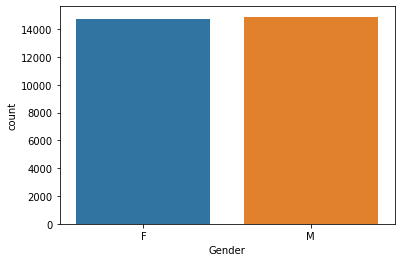

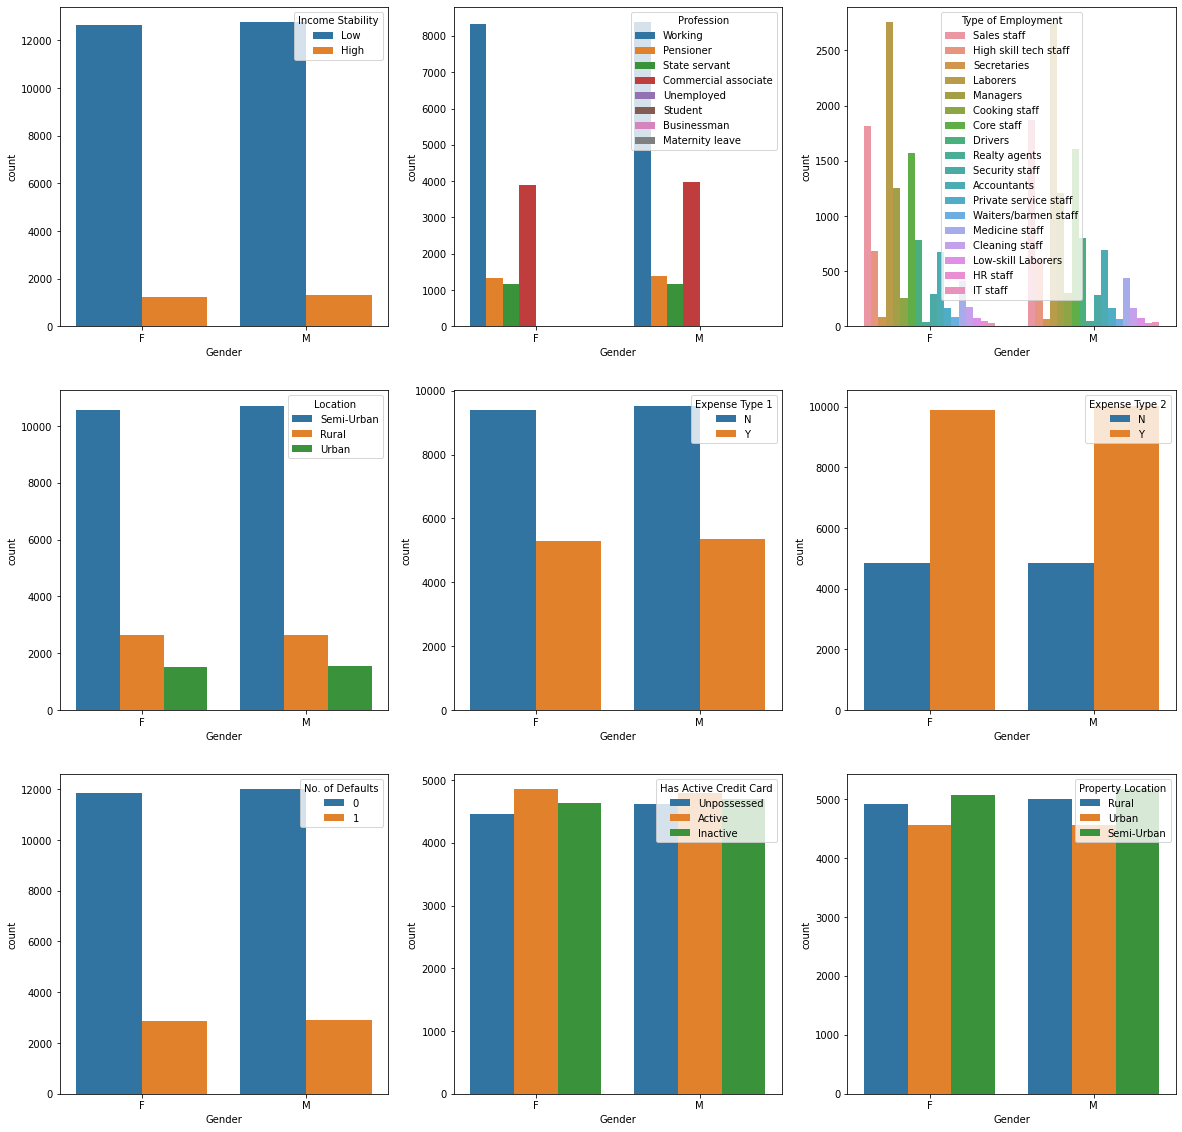

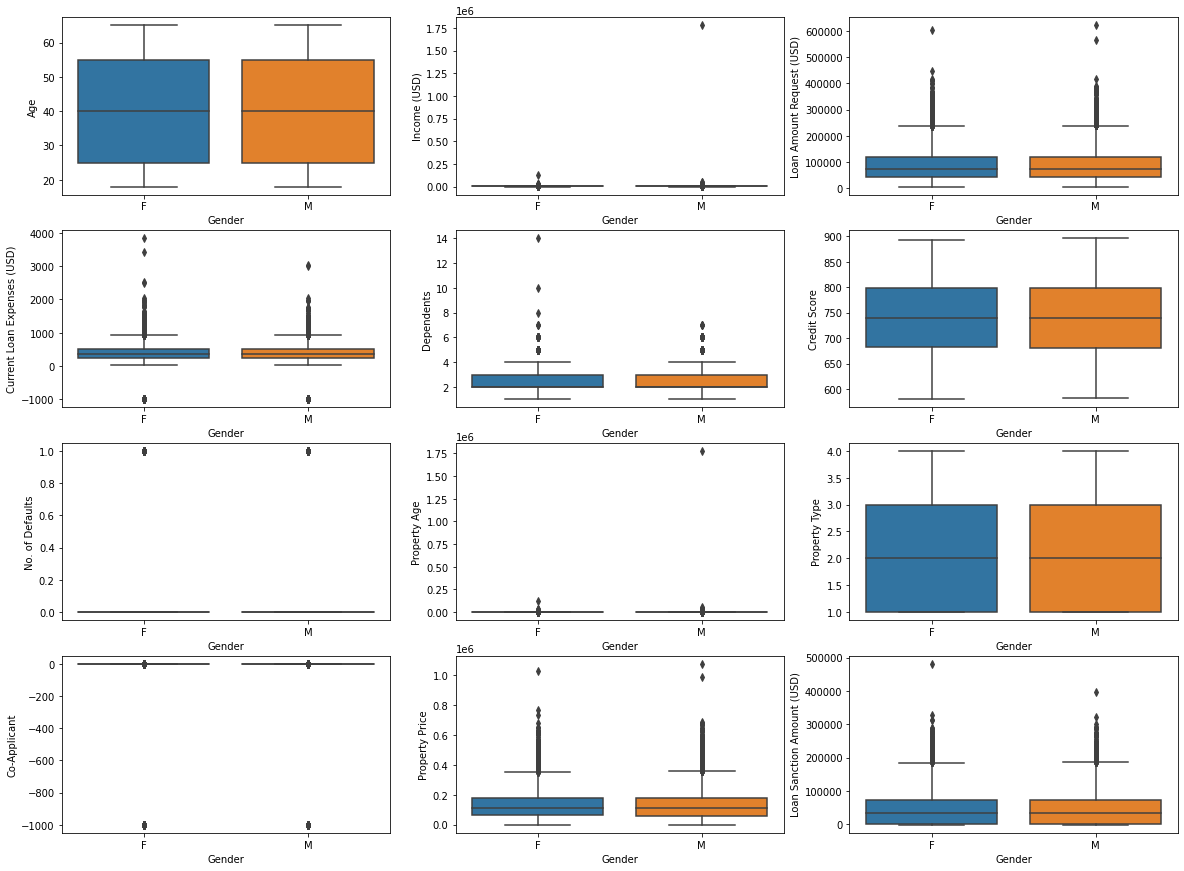

In [ ]:
import seaborn as sns
import plotly.express as px
# Gender

data=train_copy
x='Gender'

# plot the countplots
categorical_columns = ['Income Stability', 'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2', 'No. of Defaults', 'Has Active Credit Card', 'Property Location']

sns.countplot(data=data, x=x)
plt.show()

# iterate over each categorical column and plotting the countplot
plt.figure(figsize=(20,20))
for i, col in enumerate(categorical_columns):
  plt.subplot(3, 3, i+1)
  sns.countplot(data=data, x=x, hue=col)
plt.show()
print()

# Plot the countplots 
numerical_columns = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Dependents',	'Credit Score', 'No. of Defaults', 'Property Age', 'Property Type', 'Co-Applicant',	'Property Price',	'Loan Sanction Amount (USD)']
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns):
  plt.subplot(4, 3, i+1)
  sns.boxplot(data=data, x=x, y=col)
plt.show()
print()

# Plot the pie chart
fig = px.pie(data_frame=data, names='Gender')
fig.show()


From the countplots it is clear that
1.   Both genders(Male, Female) have equal representation.
2.   Same pattern can be observed for both the genders w.r.t other categorical features.

From the boxplots it can be noted that


1.   Income above 1720000 corresponds to Male Gender.
2.   Dependents over 8 correspond to Female Gender.
3.   Current Loan Expenses above 3000 correspond to Female.
4.   Loan Sanction Amounts > 400,000 correspond to Female.





In [ ]:
# Merge the data
train_len = train_copy.shape[0]
target_column = train_copy['Loan Sanction Amount (USD)']
merged_data = pd.concat([train_copy.drop('Loan Sanction Amount (USD)', axis=1), test_copy], axis=0).reset_index().drop('index',axis=1)
merged_data

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.6
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121442
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49655,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,500.59,Y,Y,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778.0
49656,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,243.02,Y,Y,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
49657,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,101.88,Y,N,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
49658,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,271.31,N,Y,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [ ]:
first_names = merged_data[merged_data['Gender'].isnull()==True]['Name'].apply(lambda x : x.partition(' ')[0].lower()).values.tolist() # Extract the first names from the null data

In [ ]:
# imputing null values from name
import re
'''
I will be using list of english names of boys and girls from the internet and try to impute null values.
'''
# Links for male names
web_link_1 = 'https://namecensus.com/baby_names/boys-2016.html'
x_path_male_1 = '//*[@id="myTable"]/tbody'

# Links for female names
web_link_2 = 'https://namecensus.com/baby_names/girls-2016.html'
x_path_female_1 = '//*[@id="myTable"]'

def get_names(web_link, xpath):

  # Make a get request on the webpage
  webD.get(web_link)

  # Create a list for storing the names
  names_string = webD.find_elements_by_xpath(xpath)[0].text.lower()
  names = re.findall(r'\w+', names_string)

  return names

# Call the above method
male_names = get_names(web_link_1, x_path_male_1)
female_names = get_names(web_link_2, x_path_female_1)

In [ ]:
male_names_in_null_data = [names for names in male_names if names in first_names] # Storing the common male names
female_names_in_null_data = [names for names in female_names if names in first_names] # Storing the common female names

In [ ]:
# Impute null values using above conditions in the gender column
def impute_null_vals_gender(original_data, inplace=False):

 if not inplace:
    # Create a copy of the data
    data = original_data.copy()

    # Store the null indices
    null_indices_1 = data[data['Gender'].isnull() == True].index

    for idx in null_indices_1:
      
      name = data['Name'].loc[idx].lower().partition(' ')[0]
      #print(name)
      # If the name lies in this list impute as M
      if name in male_names_in_null_data:
        data['Gender'].loc[idx] = 'M'
      
      elif name in female_names_in_null_data:
        data['Gender'].loc[idx] = 'F'

    null_indices = data[data['Gender'].isnull() == True].index
    
    # iterate over the null indices
    for idx in null_indices:

      # Income above 1720000 corresponds to Male Gender
      if data['Income (USD)'].loc[idx] > 1720000:
        #print(data['Gender'].loc[idx])
        data['Gender'].loc[idx] = 'M'
      
      # Dependents over 8 or Current Loan Expenses above 3000 or Loan Sanction Amounts > 400,000 correspond to Female
      elif (data['Dependents'].loc[idx] > 8) or (data['Current Loan Expenses (USD)'].loc[idx] > 3000):
        #print(data['Gender'].loc[idx])
        data['Gender'].loc[idx] = 'F'
      
      # Else create a new category called unkown
      else:
        #print(data['Gender'].loc[idx])
        data['Gender'].loc[idx] = 'Unknown'

    return data
    
 else:

    data = original_data

    # Store the null indices
    null_indices_1 = data[data['Gender'].isnull() == True].index

    for idx in null_indices_1:
      
      # If the name lies in this list impute as M
      if data['Name'].loc[idx] in male_names_in_null_data:
        data['Gender'].loc[idx] = 'M'
      
      elif data['Name'].loc[idx] in female_names_in_null_data:
        data['Gender'].loc[idx] = 'F'
 
    # Store the null indices
    null_indices = data[data['Gender'].isnull() == True].index

    # iterate over the null indices
    for idx in null_indices:

      # Income above 1720000 corresponds to Male Gender
      if data['Income (USD)'].loc[idx] > 1720000:
        #print(data['Gender'].loc[idx])
        data['Gender'].loc[idx] = 'M'
      
      # Dependents over 8 or Current Loan Expenses above 3000 or Loan Sanction Amounts > 400,000 correspond to Female
      elif (data['Dependents'].loc[idx] > 8) or (data['Current Loan Expenses (USD)'].loc[idx] > 3000):
        #print(data['Gender'].loc[idx])
        data['Gender'].loc[idx] = 'F'
      
      # Else create a new category called unkown
      else:
        #print(data['Gender'].loc[idx])
        data['Gender'].loc[idx] = 'Unknown'
      
# Call the above function
impute_null_vals_gender(merged_data, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
merged_data.isnull().sum()

Customer ID                        0
Name                               0
Gender                             0
Age                                0
Income (USD)                    5243
Income Stability                2471
Profession                         0
Type of Employment             11877
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      250
Expense Type 1                     0
Expense Type 2                     0
Dependents                      3588
Credit Score                    2413
No. of Defaults                    0
Has Active Credit Card          2622
Property ID                        0
Property Age                    5652
Property Type                      0
Property Location                507
Co-Applicant                       0
Property Price                     0
dtype: int64

In [ ]:
# Encode the Gender column
def custom_encoder(x):
  '''
  Following encodings are done:
  1. M->0
  2. F->1
  3. Uknown->2
  '''
  if x == 'M':
    x = 0
  elif x == 'F':
    x = 1
  elif x == 'Unknown':
    x = 2
  return x

# apply the encodinf
merged_data['Gender'] = merged_data['Gender'].apply(lambda x : custom_encoder(x))

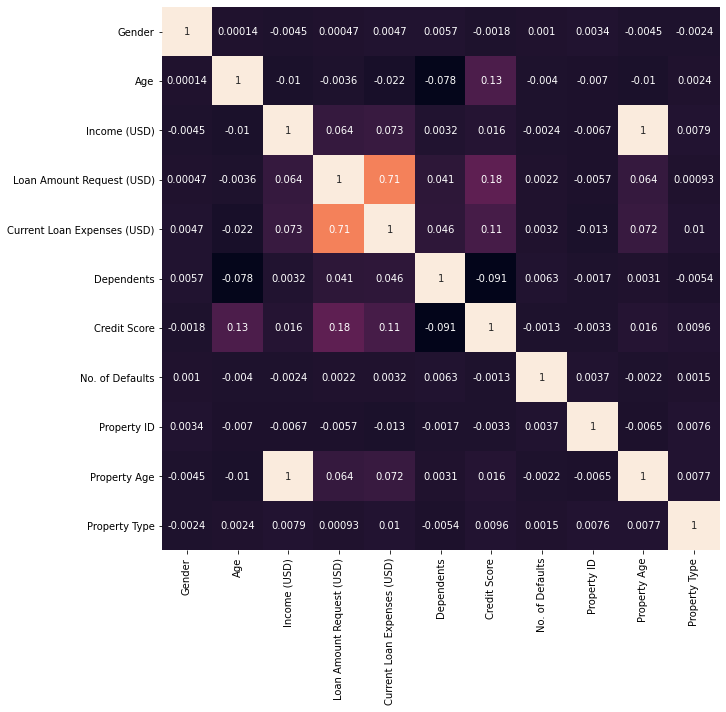


!Attention
Either Co-Applicant column has some object type values or the column doesn't exist in list
!Attention
Either Property Price column has some object type values or the column doesn't exist in list
!Attention
Either Loan Sanction Amount (USD) column has some object type values or the column doesn't exist in list


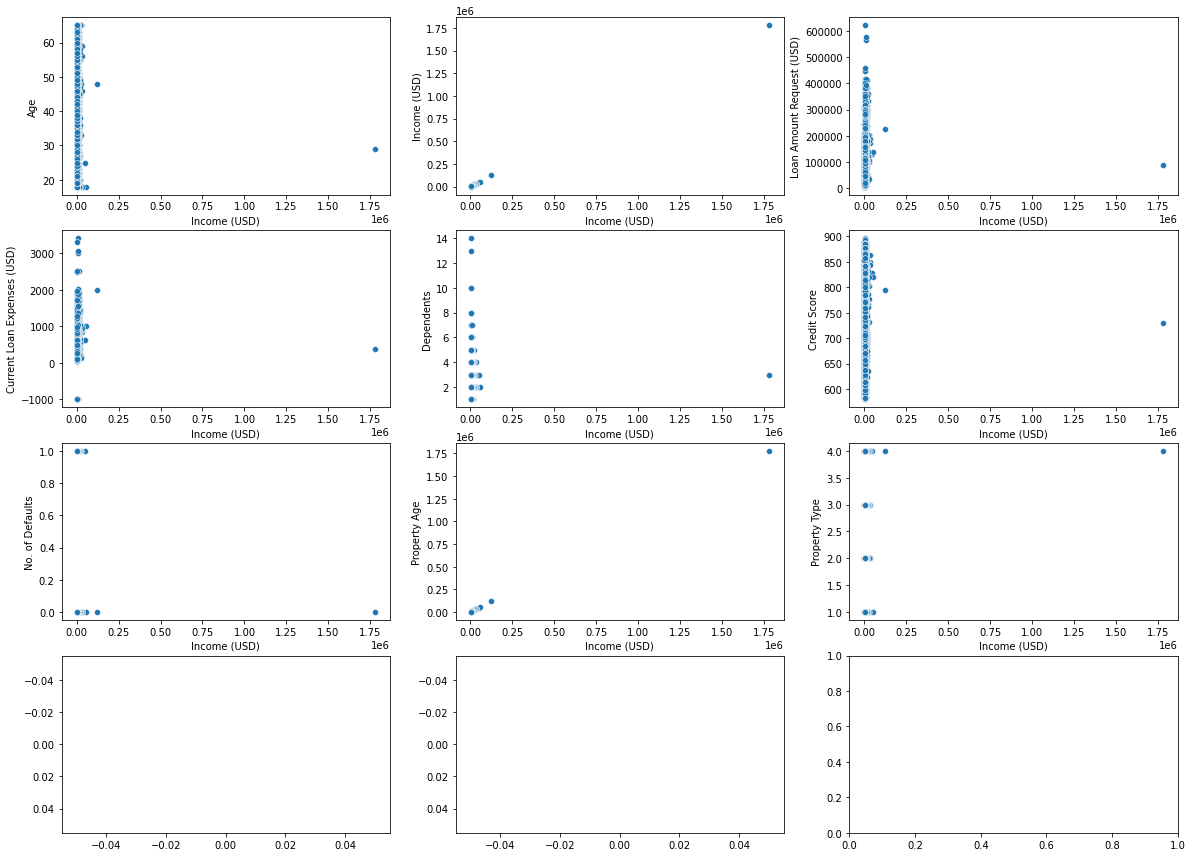

In [ ]:
# Income (USD)

# Check for correlation
corr_matrix = merged_data.corr()

# Plot a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()
print()

# plot scatter plots against numerical columns
data=merged_data
x = 'Income (USD)'
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns):
  try:
    plt.subplot(4, 3, i+1)
    sns.scatterplot(data=data, x=x, y=col)
  except:
    print('!Attention')
    print("Either {} column has some object type values or the column doesn't exist in list".format(col))
plt.show()


In [ ]:
merged_data[merged_data['Property Price'] == '?'] = merged_data[merged_data['Property Price'] == '?'].replace('?', np.nan)
merged_data['Property Price'] = merged_data['Property Price'].astype('float')

In [ ]:
merged_data[merged_data['Co-Applicant'] == '?'] = merged_data[merged_data['Co-Applicant'] == '?'].replace('?', np.nan)
merged_data['Co-Applicant'] = merged_data['Co-Applicant'].astype('float') # Cannot convert NaN to integer but can conver NaN into float

In [ ]:
numerical_columns.remove('Loan Sanction Amount (USD)')

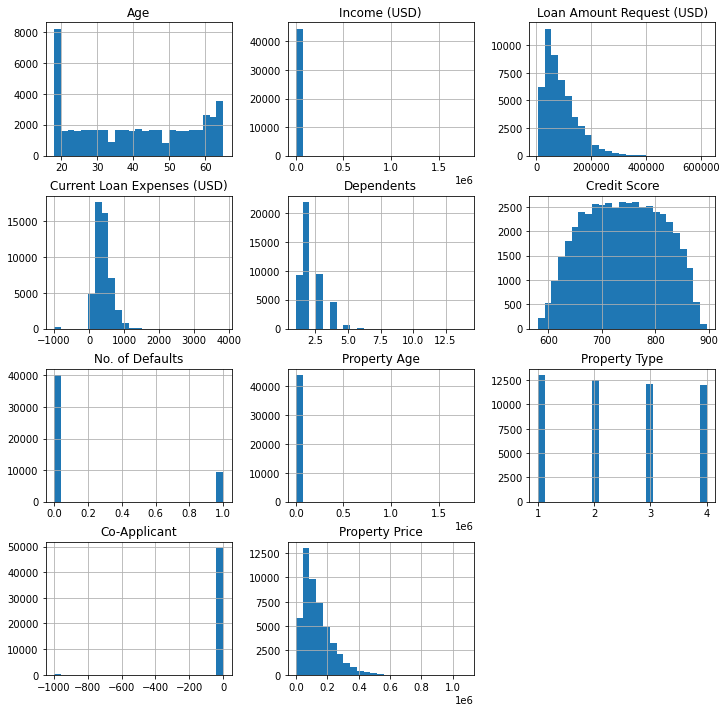

In [ ]:
# Plotting the frequency distribution of the numerical columns
merged_data[numerical_columns].hist(figsize=(12,12), bins=25)
plt.show()

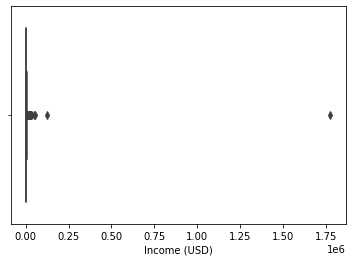

In [ ]:
sns.boxplot(data=data, x=x)
plt.show()

In [ ]:
# impute the mean value inplace of null value
mean_income = merged_data['Income (USD)'].mean()
merged_data['Income (USD)'] = merged_data['Income (USD)'].fillna(mean_income)

In [ ]:
merged_data.isnull().sum()

Customer ID                        0
Name                               0
Gender                             0
Age                                0
Income (USD)                       0
Income Stability                2471
Profession                         0
Type of Employment             11877
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      250
Expense Type 1                     0
Expense Type 2                     0
Dependents                      3588
Credit Score                    2413
No. of Defaults                    0
Has Active Credit Card          2622
Property ID                        0
Property Age                    5652
Property Type                      0
Property Location                507
Co-Applicant                      77
Property Price                   168
dtype: int64

From the heatmap it can be noted that


1.   Current Loan Expenses (USD) and Loan Amount Request (USD) have a high correlation.
2.   Slight correlation can be observed between Age and Credit Score and Loan Amount Request (USD) and Credit Score.
3.   Loan Amount Requested and Property Price have a very high positive correlation

From the Frequency Distribution plot it can be noted that


1.   Credit Score follows a Normal Distribution
2.   More younger people seek loan.
3.   Current Loan Expenses has outliers.
4.   Co Applicant Column has outliers as well.





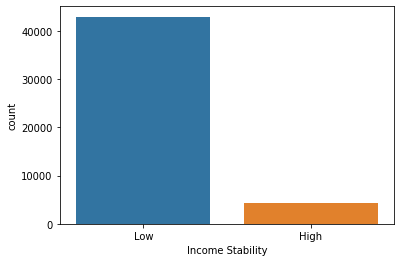

In [ ]:
# Incmoe Stability
merged_data['Income Stability'].value_counts()

# plotting countplot
sns.countplot(data=data, x='Income Stability')
plt.show()

# pie chart
fig = px.pie(data_frame=merged_data, names='Income Stability', title='Distribution of Income Stability')
fig.show()

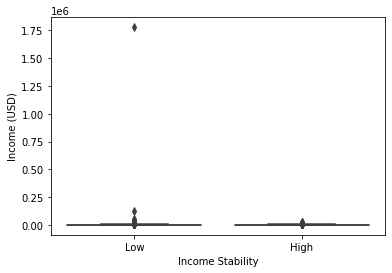

In [ ]:
sns.boxplot(data=merged_data, x='Income Stability', y='Income (USD)')
plt.show()

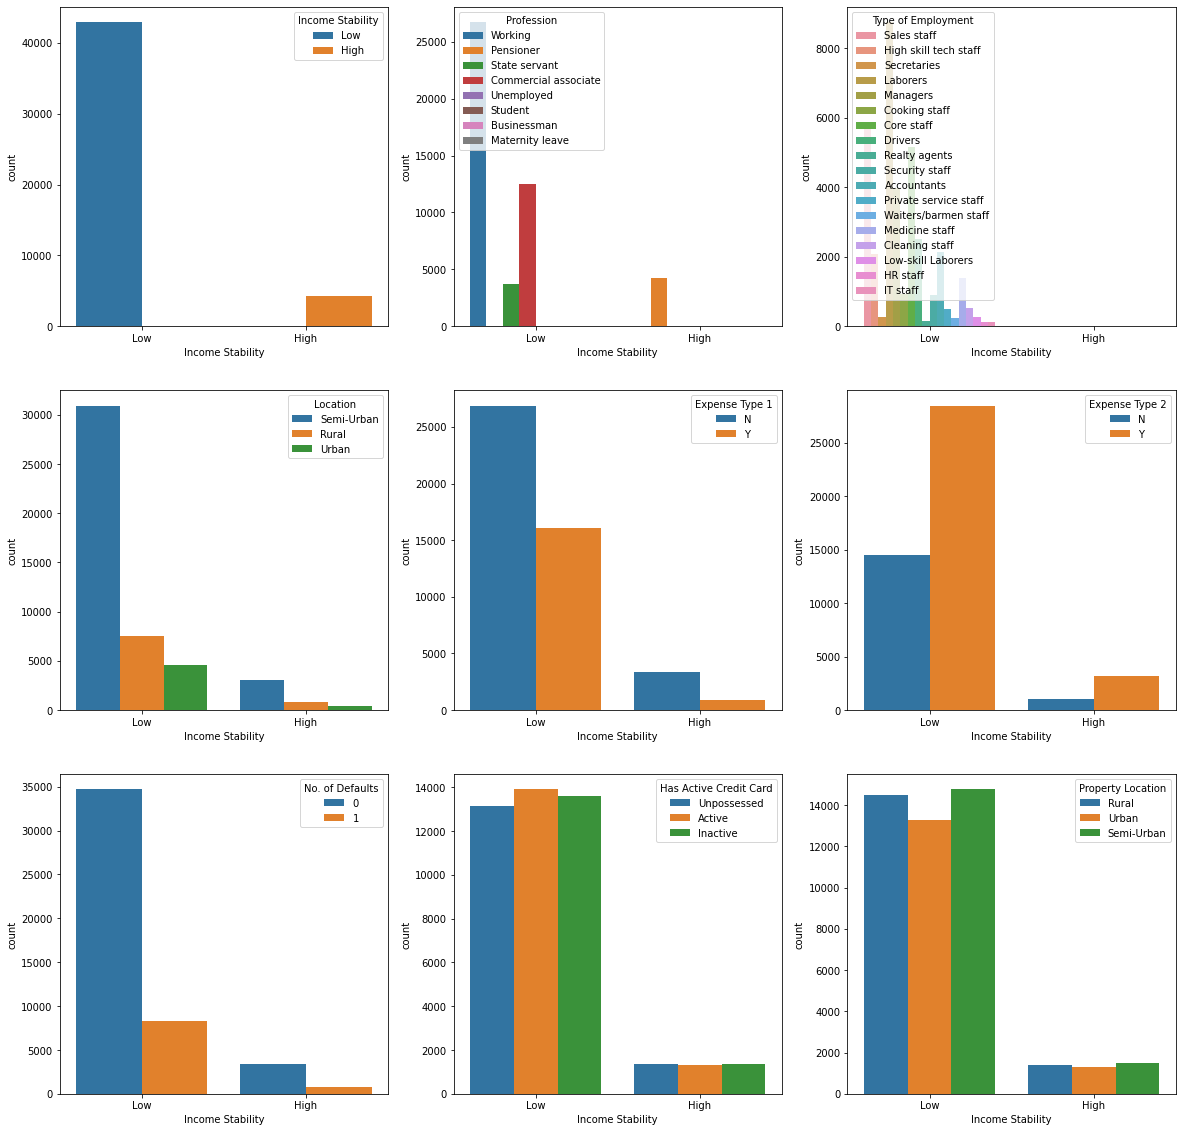

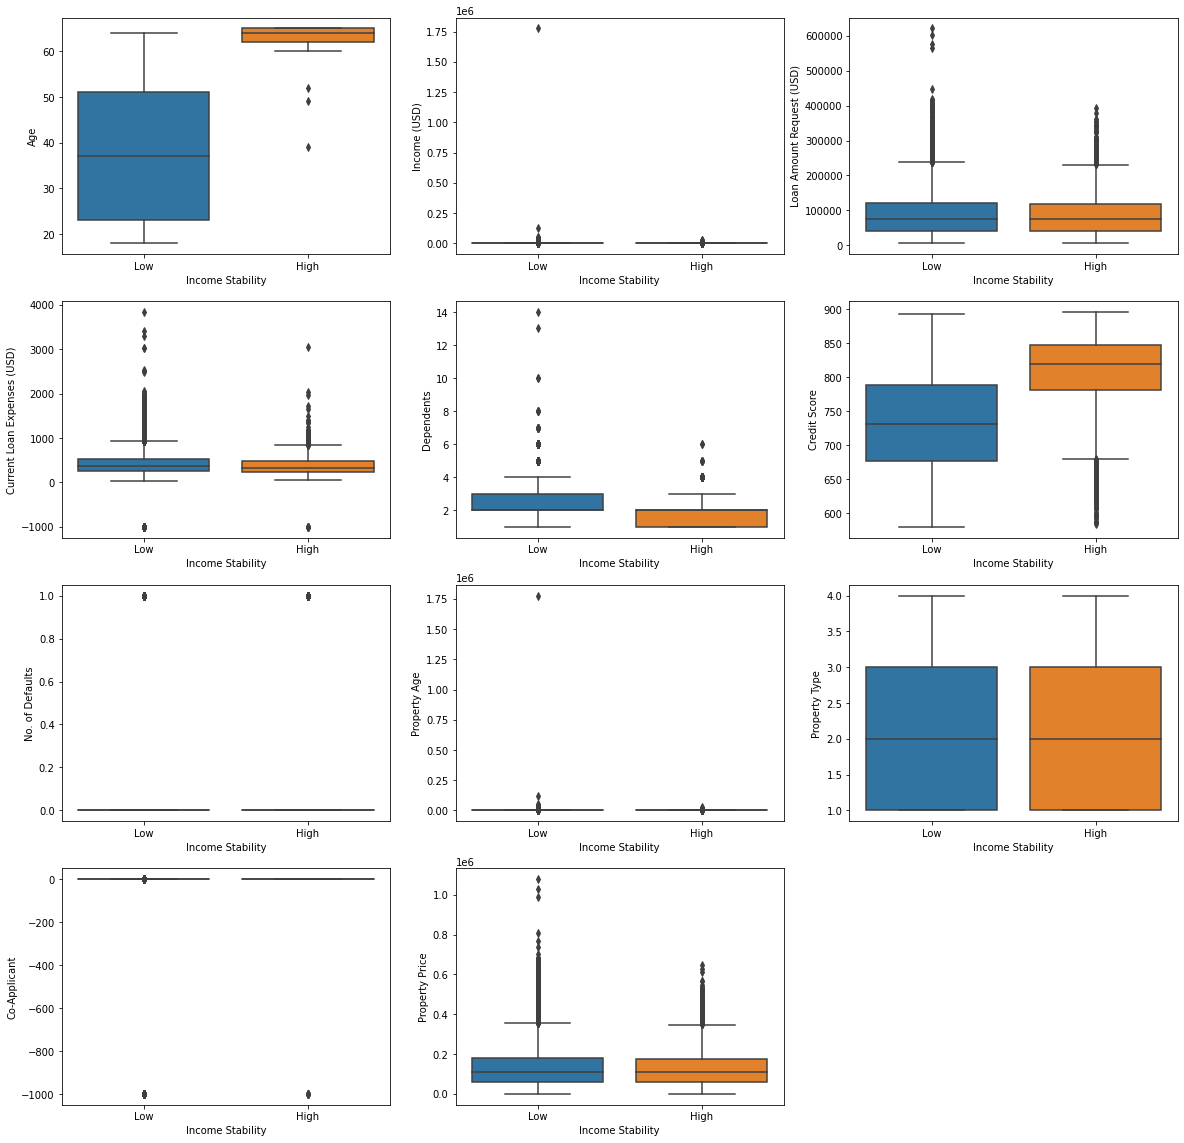

In [ ]:
# Plot countplots w.r.t other categorical columns
data = merged_data
x = 'Income Stability'
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns):
  plt.subplot(3, 3, i+1)
  sns.countplot(data=data, x=x, hue=col)
plt.show()

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns):
  plt.subplot(4, 3, i+1)
  sns.boxplot(data=data, x=x, y=col)
plt.show()

In [ ]:
inc_stab_null_data = merged_data[merged_data['Income Stability'].isnull() == True]
inc_stab_null_data

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
33,C-15497,Roslyn Yetter,1,18,1220.16000,NaN,Working,Laborers,Semi-Urban,35595.86,153.25,N,N,3.0,706.08,0,Unpossessed,681,1220.16,4,Semi-Urban,1.0,41948.44
62,C-25696,Pam Messmer,0,51,1993.49000,NaN,Working,Private service staff,Rural,97298.45,275.74,Y,Y,2.0,801.23,0,Active,94,1993.49,1,Urban,-999.0,157137.04
115,C-24421,Genaro Meneses,0,22,4493.53000,NaN,Working,Sales staff,Semi-Urban,62366.83,283.94,Y,Y,2.0,797.71,0,Unpossessed,980,4493.53,3,Urban,1.0,113945.92
155,C-9578,Cuc Hermes,0,64,3637.70000,NaN,Commercial associate,Managers,Rural,23811.63,162.44,N,N,2.0,811.11,0,Unpossessed,322,3637.70,3,Semi-Urban,1.0,40867.64
177,C-12991,Kyung Ardoin,0,50,2590.25375,NaN,Working,Laborers,Semi-Urban,112900.61,542.32,N,Y,3.0,801.33,0,Active,618,NaN,2,Urban,1.0,189468.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49416,C-6605,Lakiesha Payer,0,28,2078.11000,NaN,Working,Laborers,Semi-Urban,67088.56,323.24,N,Y,NaN,633.97,0,Inactive,581,2078.11,2,Rural,0.0,98386.97
49450,C-11433,America Moats,1,63,8414.09000,NaN,Pensioner,NaN,Urban,162203.46,838.60,N,Y,2.0,702.07,0,Inactive,481,8414.09,2,Rural,0.0,296850.48
49466,C-17182,Corrine Saylors,0,62,3302.48000,NaN,Working,Laborers,Semi-Urban,139954.97,703.94,Y,Y,2.0,NaN,0,Active,828,3302.48,3,Rural,1.0,258103.54
49576,C-1802,Wiley Splawn,1,29,1856.81000,NaN,Working,Drivers,Rural,111636.52,314.61,Y,Y,3.0,684.78,1,Unpossessed,716,1856.81,3,Semi-Urban,1.0,166555.04


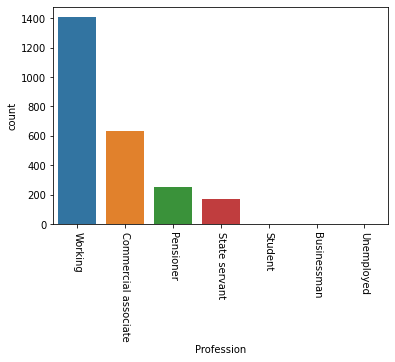

In [ ]:
sns.countplot(data=inc_stab_null_data, x='Profession')
plt.xticks(rotation=-90)
plt.show()

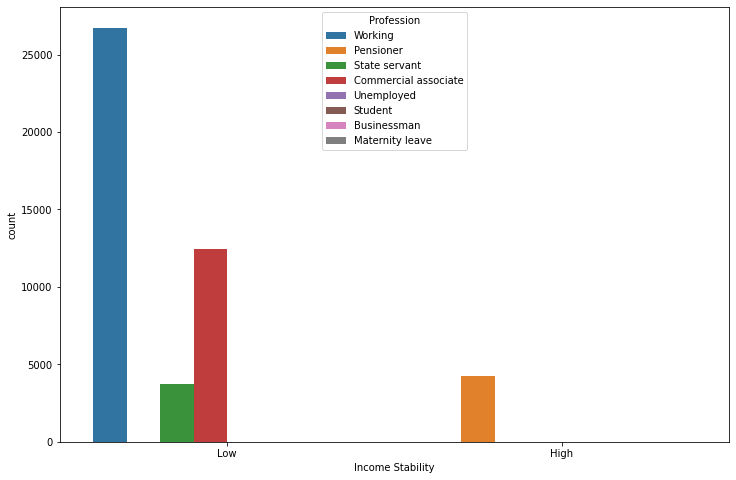

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=merged_data, x='Income Stability', hue='Profession')
plt.show()

In [ ]:
# impute low as the null values
merged_data['Income Stability'] = merged_data['Income Stability'].fillna('Low')

In [ ]:
# since, the columns property price and loan amount requested have very high correlation, it is better to drop the property price column.
merged_data.drop('Property Price', axis=1, inplace=True)

In [ ]:
merged_data.isnull().sum()

Customer ID                        0
Name                               0
Gender                             0
Age                                0
Income (USD)                       0
Income Stability                   0
Profession                         0
Type of Employment             11877
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      250
Expense Type 1                     0
Expense Type 2                     0
Dependents                      3588
Credit Score                    2413
No. of Defaults                    0
Has Active Credit Card          2622
Property ID                        0
Property Age                    5652
Property Type                      0
Property Location                507
Co-Applicant                      77
dtype: int64

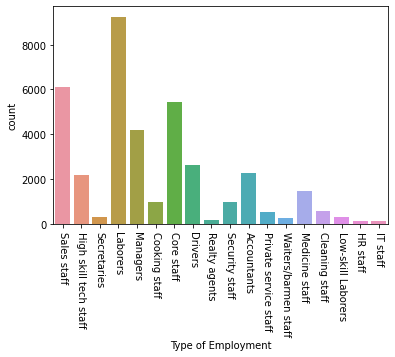

In [ ]:
# Type of Employment

merged_data['Type of Employment'].value_counts()

# plot countplots
data = merged_data
x = 'Type of Employment'

sns.countplot(data=data, x=x)
plt.xticks(rotation=-90)
plt.show()

In [ ]:
merged_data[merged_data['Profession'] == 'Student']

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant
7982,C-22417,Nova Jacobi,0,36,1914.58,Low,Student,NaN,Semi-Urban,58056.11,345.20,N,N,1.0,637.14,1,Inactive,97,1914.58,1,Rural,1.0
42167,C-42603,Evelina Right,1,41,2446.10,Low,Student,Core staff,Rural,82889.17,476.80,N,Y,2.0,820.63,0,Unpossessed,960,2446.10,1,Urban,1.0
45736,C-28984,Enedina Prideaux,1,41,2121.81,Low,Student,Drivers,Semi-Urban,186812.92,576.59,Y,Y,4.0,702.15,0,NaN,558,2121.81,2,Rural,1.0
48438,C-5017,Raina Robards,0,64,3315.77,Low,Student,Core staff,Urban,98839.82,823.63,N,N,3.0,819.81,0,Unpossessed,534,3315.77,2,Rural,1.0
49064,C-18886,Mariana Medeiros,0,41,2706.15,Low,Student,Laborers,Semi-Urban,93459.16,349.26,N,N,1.0,687.50,0,NaN,402,2706.15,4,Semi-Urban,1.0


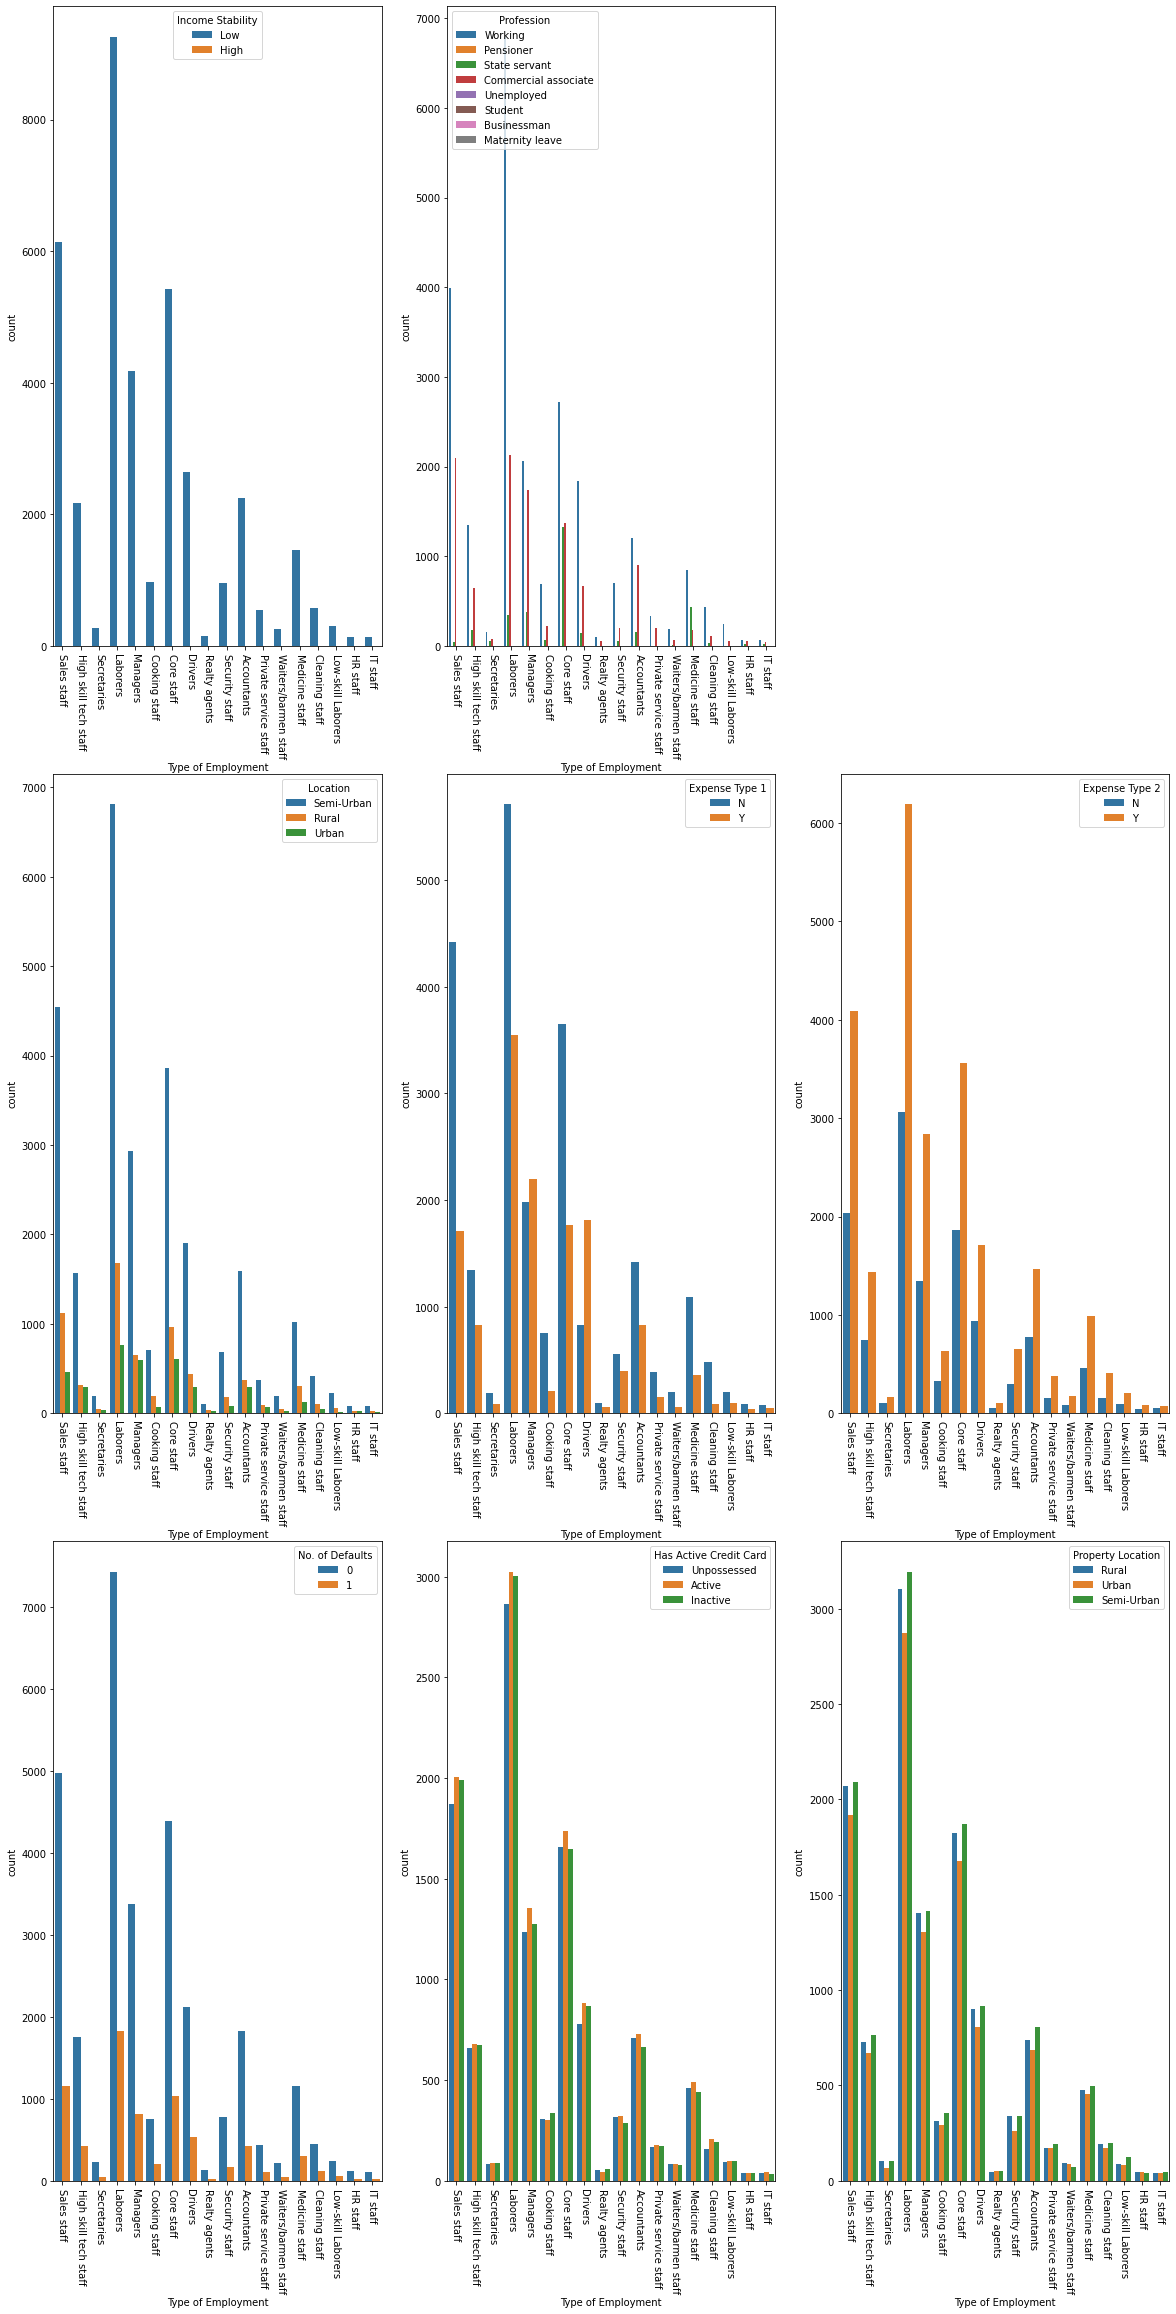

In [ ]:
# Extract the null data
emp_null_data = merged_data[merged_data['Type of Employment'].isnull() == True]

# Plot countplots w.r.t categorical columns
plt.figure(figsize=(20,40))
for i, col in enumerate(categorical_columns):
  if col != 'Type of Employment':
      plt.subplot(3, 3, i+1)
      sns.countplot(data=data, x=x, hue=col)
      plt.xticks(rotation=-90)
plt.show()

In [ ]:
professions = [prof for prof in merged_data['Profession'].value_counts().index]

In [ ]:
professions

['Working',
 'Commercial associate',
 'Pensioner',
 'State servant',
 'Student',
 'Unemployed',
 'Businessman',
 'Maternity leave']

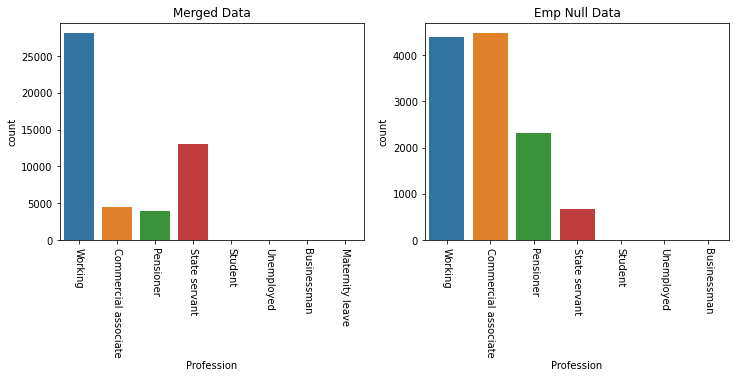

In [ ]:
# Plot the countplots for Profession for both merged_data and emp_null_data

fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(data=merged_data, x='Profession', ax=ax[0])
ax[0].set_xticklabels(labels = professions, rotation=-90)
ax[0].set_title('Merged Data')
sns.countplot(data=emp_null_data, x='Profession', ax=ax[1])
ax[1].set_xticklabels(labels = professions, rotation=-90)
ax[1].set_title('Emp Null Data')
plt.show()


In [ ]:
# group the merged data by profession
merged_data[(merged_data['Profession'] == 'Commercial associate') | (merged_data['Profession'] == 'Working') | (merged_data['Profession'] == 'Pensioner')]

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant
0,C-36995,Frederica Shealy,1,56,1933.05000,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1.0
1,C-33999,America Calderone,0,32,4952.91000,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1.0
2,C-3770,Rosetta Verne,1,65,988.19000,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0.0
3,C-26480,Zoe Chitty,1,65,2590.25375,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1.0
4,C-23459,Afton Venema,1,31,2614.77000,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49655,C-9076,Tobias Davilla,1,19,1349.60000,Low,Commercial associate,NaN,Semi-Urban,156766.97,500.59,Y,Y,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1.0
49656,C-17587,Evelina Hodges,0,22,2019.78000,Low,Working,Core staff,Urban,47924.80,243.02,Y,Y,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1.0
49657,C-46479,Karlyn Mckinzie,0,19,2252.03000,Low,Working,Core staff,Semi-Urban,18629.88,101.88,Y,N,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0.0
49658,C-3099,Mariana Pulver,1,21,1845.35000,Low,Working,NaN,Semi-Urban,95430.73,271.31,N,Y,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1.0


In [ ]:
merged_data[(merged_data['Profession'] == 'Commercial associate')]['Type of Employment'].value_counts()

Laborers                 2123
Sales staff              2094
Managers                 1740
Core staff               1375
Accountants               899
Drivers                   663
High skill tech staff     646
Cooking staff             218
Private service staff     198
Security staff            198
Medicine staff            178
Cleaning staff            106
Secretaries                74
Waiters/barmen staff       68
Realty agents              59
Low-skill Laborers         55
HR staff                   52
IT staff                   45
Name: Type of Employment, dtype: int64

In [ ]:
merged_data[(merged_data['Profession'] == 'Pensioner')]['Type of Employment'].value_counts()

Series([], Name: Type of Employment, dtype: int64)

In [ ]:
merged_data[(merged_data['Profession'] == 'Working')]['Type of Employment'].value_counts()

Laborers                 6794
Sales staff              3994
Core staff               2715
Managers                 2062
Drivers                  1840
High skill tech staff    1352
Accountants              1200
Medicine staff            840
Security staff            703
Cooking staff             684
Cleaning staff            433
Private service staff     337
Low-skill Laborers        238
Waiters/barmen staff      186
Secretaries               152
Realty agents              93
IT staff                   67
HR staff                   64
Name: Type of Employment, dtype: int64

In [ ]:
merged_data[(merged_data['Profession'] == 'State servant')]['Type of Employment'].value_counts()

Core staff               1327
Medicine staff            434
Managers                  380
Laborers                  341
High skill tech staff     180
Accountants               150
Drivers                   141
Cooking staff              64
Secretaries                51
Security staff             50
Sales staff                43
Cleaning staff             29
IT staff                   16
HR staff                   15
Waiters/barmen staff        4
Private service staff       3
Low-skill Laborers          2
Realty agents               1
Name: Type of Employment, dtype: int64

**if the Profession is Pensioner then the Type of Employment should be None. If the Profession is State servant impute Core staff as the Type of Employment.**

In [ ]:
null_indices_emp = emp_null_data.index
# iterate over the null indexes
for idx in null_indices_emp:

  if merged_data['Profession'].loc[idx] == 'Pensioner':
    merged_data['Type of Employment'].loc[idx] = 'None'
  elif merged_data['Profession'].loc[idx] == 'State servant':
    merged_data['Type of Employment'].loc[idx] = 'Core staff'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
merged_data['Type of Employment'] = merged_data['Type of Employment'].fillna('Unknown')

In [ ]:
merged_data.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment                0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     250
Expense Type 1                    0
Expense Type 2                    0
Dependents                     3588
Credit Score                   2413
No. of Defaults                   0
Has Active Credit Card         2622
Property ID                       0
Property Age                   5652
Property Type                     0
Property Location               507
Co-Applicant                     77
dtype: int64

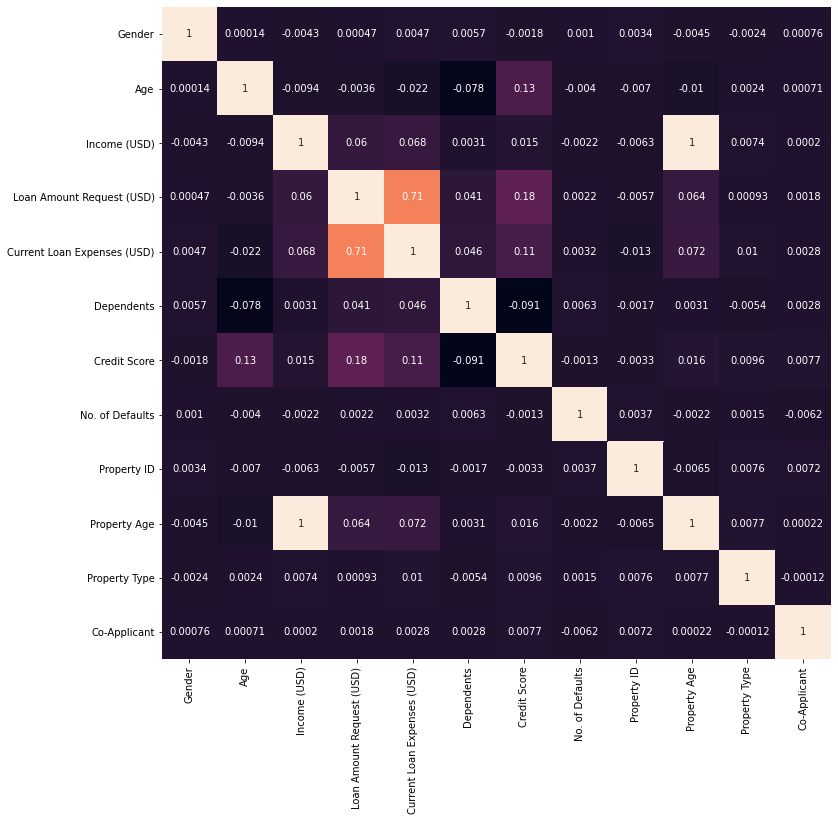

In [ ]:
# Current Loan Expenses (USD)
plt.figure(figsize=(12,12))
sns.heatmap(merged_data.corr(), annot=True, cbar=False)
plt.show()

In [ ]:
# Since Current Loan Expenses (USD) and Loan Amount Request (USD) are highly correlated we can use it to predict the null values
sub_data = merged_data[['Loan Amount Request (USD)', 'Current Loan Expenses (USD)']]
null_indices_cle = sub_data[sub_data['Current Loan Expenses (USD)'].isnull()==True].index
test_set = sub_data[sub_data['Current Loan Expenses (USD)'].isnull()==True].drop('Current Loan Expenses (USD)', axis=1)
sub_data.dropna(axis=0, inplace=True)

# Divide into X and y
X = sub_data['Loan Amount Request (USD)']
y = sub_data['Current Loan Expenses (USD)']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



16763    120951.03
38783     46388.02
25023     61363.04
44253      7226.63
24145    162408.55
           ...    
11337    227901.25
44967     33640.19
38359    111134.57
863      154684.50
15872     21823.76
Name: Loan Amount Request (USD), Length: 39528, dtype: float64

In [ ]:
# Model building 
from xgboost import XGBRegressor

# Model Object
xgb_reg = XGBRegressor()

# Fit the model
xgb_reg.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1,1))

# Check the model performance
xgb_reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))

[11:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5231406802044243

In [ ]:
# make predictions
predictions = xgb_reg.predict(test_set.values.reshape(-1,1))

In [ ]:
# Impute the null values
for i, val in zip(null_indices_cle, predictions):
  merged_data['Current Loan Expenses (USD)'].loc[i] = val

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
merged_data.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment                0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                     3588
Credit Score                   2413
No. of Defaults                   0
Has Active Credit Card         2622
Property ID                       0
Property Age                   5652
Property Type                     0
Property Location               507
Co-Applicant                     77
dtype: int64

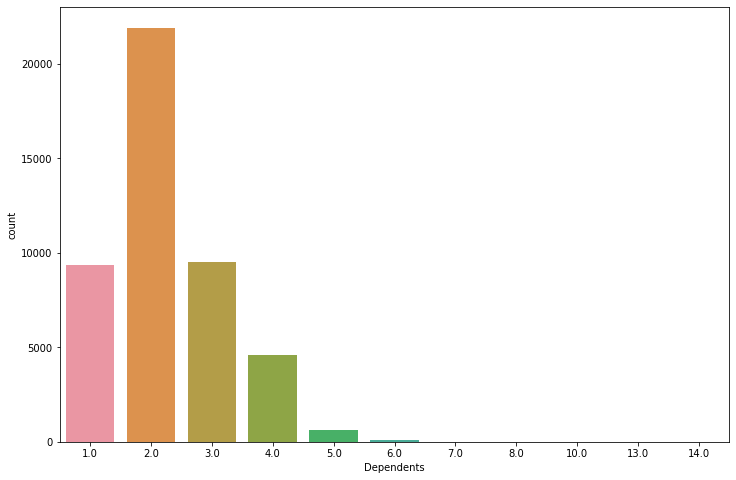

In [ ]:
# Dependents
plt.figure(figsize=(12,8))
sns.countplot(x= merged_data['Dependents'])
plt.show()

In [ ]:
numerical_columns.remove('Property Price')

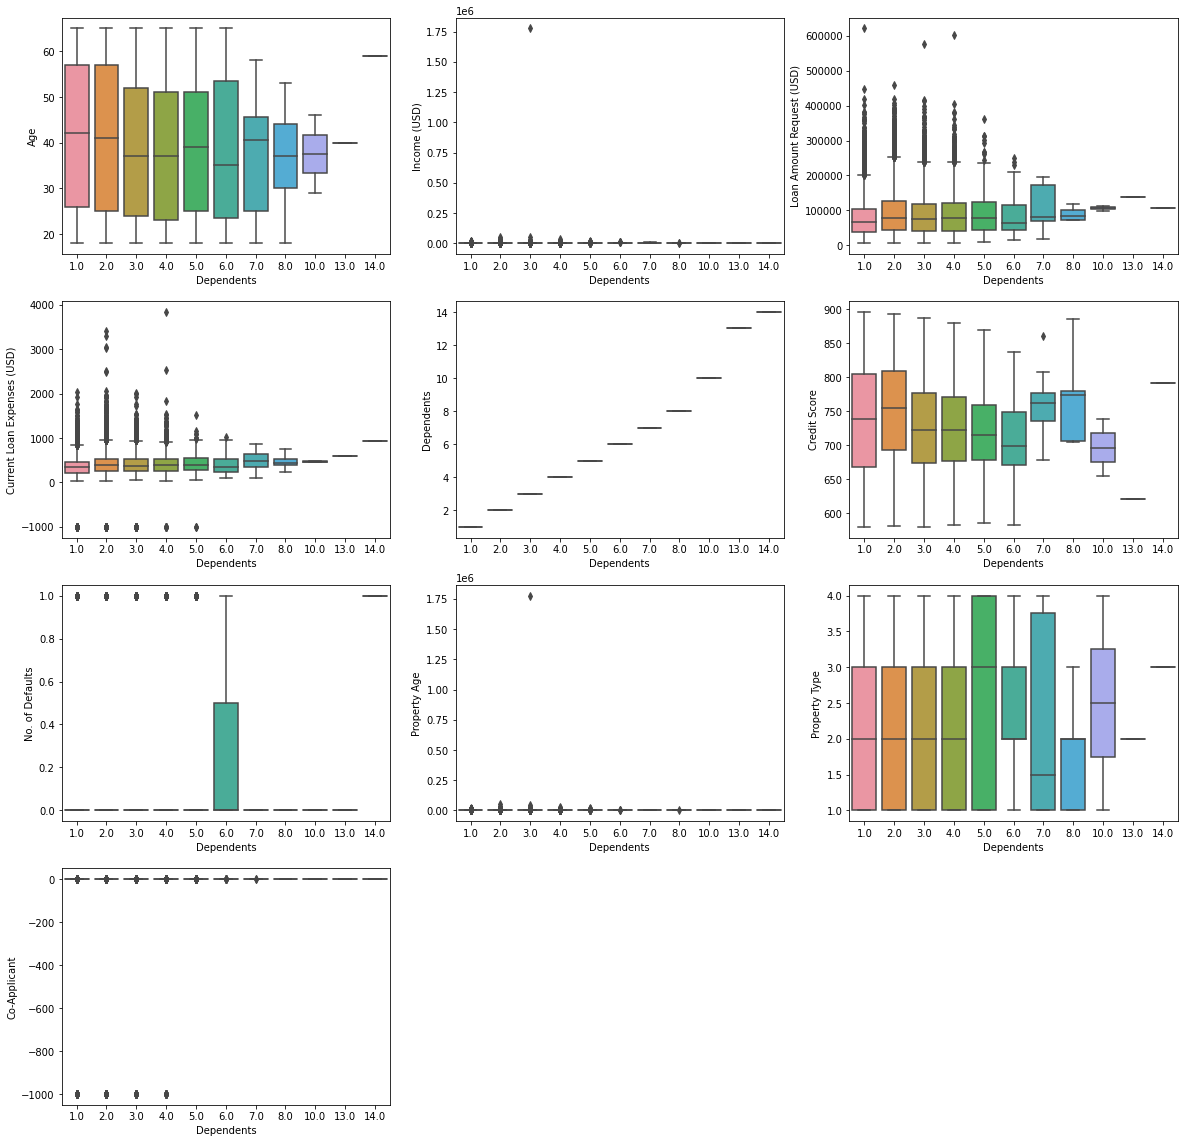

In [ ]:
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_columns):
  plt.subplot(4,3, i+1)
  sns.boxplot(data=merged_data, x='Dependents', y=col)

In [ ]:
merged_data.groupby('Dependents').mean()

,Gender,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant
Dependents,,,,,,,,,,,
1.0,0.492337,41.449791,2513.331315,77557.931446,367.623059,737.383840,0.190655,503.105241,2505.380548,2.464580,-2.501020
2.0,0.507347,40.838870,2584.859213,93708.534016,417.448572,750.081833,0.191750,500.343068,2583.069033,2.471753,-2.445881
3.0,0.509814,38.117036,2725.598420,88228.175895,405.666375,726.043050,0.188517,501.159966,2739.214373,2.459326,-1.859230
4.0,0.494015,37.919260,2487.885113,89022.093980,411.028453,724.670591,0.197171,498.456148,2475.352661,2.439608,-3.049423
5.0,0.539837,38.463415,2605.747480,91032.778537,417.872271,721.626864,0.232520,521.370732,2601.708360,2.505691,0.882927
6.0,0.464789,38.183099,2561.342764,84463.731268,405.136761,710.391493,0.253521,514.859155,2448.055645,2.366197,0.845070
7.0,0.500000,36.600000,2976.334375,108302.540000,489.463000,758.177000,0.000000,250.700000,3019.232222,2.200000,0.800000
8.0,0.400000,36.400000,2014.936000,89490.500000,466.510000,770.348000,0.000000,417.200000,1985.580000,1.800000,1.000000
10.0,0.500000,37.500000,2118.450000,105812.180000,468.465000,696.545000,0.000000,141.000000,2118.450000,2.500000,1.000000


In [ ]:
# impute the most frequent values
merged_data['Dependents'] = merged_data['Dependents'].fillna(2.0)

In [ ]:
merged_data.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment                0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                   2413
No. of Defaults                   0
Has Active Credit Card         2622
Property ID                       0
Property Age                   5652
Property Type                     0
Property Location               507
Co-Applicant                     77
dtype: int64

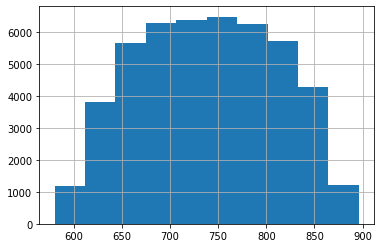

In [ ]:
merged_data['Credit Score'].hist()

In [ ]:
from scipy.stats import mode

In [ ]:
merged_data['Credit Score'].median(), merged_data['Credit Score'].mean(), mode(merged_data['Credit Score'])

(739.71,
 739.4328763731007,
 ModeResult(mode=array([792.76]), count=array([10])))

**From above, it can be observed mean = median = mode (approximately)**

In [ ]:
credit_score_mean = merged_data['Credit Score'].mean()
merged_data['Credit Score'] = merged_data['Credit Score'].fillna(credit_score_mean, axis=0) # impute mean value as the null value

In [ ]:
merged_data[['Income (USD)', 'Property Age']]

,Income (USD),Property Age
0,1933.05000,1933.05
1,4952.91000,4952.91
2,988.19000,988.19
3,2590.25375,NaN
4,2614.77000,2614.77
...,...,...
49655,1349.60000,1349.60
49656,2019.78000,2019.78
49657,2252.03000,2252.03
49658,1845.35000,1845.35


**Income (USD) and Property Age have same values**

In [ ]:
merged_data.drop('Property Age', axis=1, inplace=True)

In [ ]:
merged_data.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment                0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card         2622
Property ID                       0
Property Type                     0
Property Location               507
Co-Applicant                     77
dtype: int64

In [ ]:
describe_data(merged_data).perc_null_vals()

=====================================================Percentage Null Values====================================================================================
Percentage of null values in Customer ID column is 0.00%
Percentage of null values in Name column is 0.00%
Percentage of null values in Gender column is 0.00%
Percentage of null values in Age column is 0.00%
Percentage of null values in Income (USD) column is 0.00%
Percentage of null values in Income Stability column is 0.00%
Percentage of null values in Profession column is 0.00%
Percentage of null values in Type of Employment column is 0.00%
Percentage of null values in Location column is 0.00%
Percentage of null values in Loan Amount Request (USD) column is 0.00%
Percentage of null values in Current Loan Expenses (USD) column is 0.00%
Percentage of null values in Expense Type 1 column is 0.00%
Percentage of null values in Expense Type 2 column is 0.00%
Percentage of null values in Dependents column is 0.00%
Percentage of null

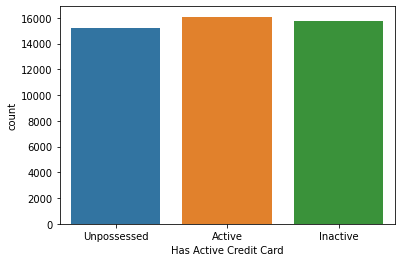

In [ ]:
sns.countplot(x=merged_data['Has Active Credit Card'])
plt.show()

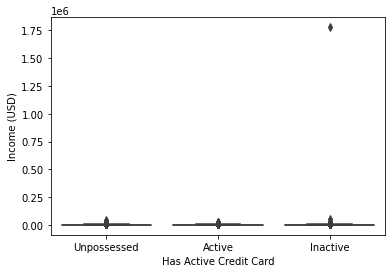

In [ ]:
sns.boxplot(x=merged_data['Has Active Credit Card'], y=merged_data['Income (USD)'])
plt.show()

In [ ]:
merged_data['Has Active Credit Card'] = merged_data['Has Active Credit Card'].fillna('Unknown', axis=0)

In [ ]:
merged_data.isnull().sum()

Customer ID                      0
Name                             0
Gender                           0
Age                              0
Income (USD)                     0
Income Stability                 0
Profession                       0
Type of Employment               0
Location                         0
Loan Amount Request (USD)        0
Current Loan Expenses (USD)      0
Expense Type 1                   0
Expense Type 2                   0
Dependents                       0
Credit Score                     0
No. of Defaults                  0
Has Active Credit Card           0
Property ID                      0
Property Type                    0
Property Location              507
Co-Applicant                    77
dtype: int64

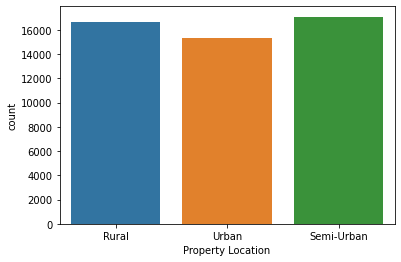

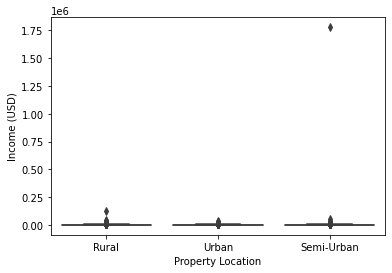

In [ ]:
sns.countplot(x=merged_data['Property Location'])
plt.show()

sns.boxplot(x=merged_data['Property Location'], y=merged_data['Income (USD)'])
plt.show()

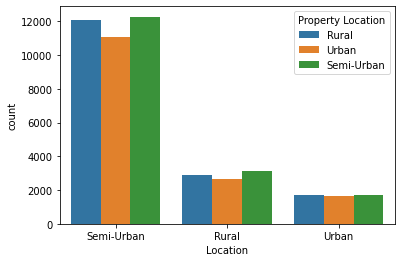

In [ ]:
sns.countplot(data=merged_data, x='Location', hue='Property Location')
plt.show()

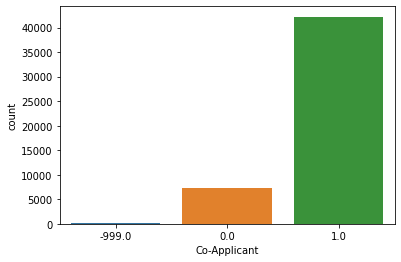

In [ ]:
sns.countplot(data=merged_data, x='Co-Applicant')

In [ ]:
merged_data['Co-Applicant'] = merged_data['Co-Applicant'].fillna(1.0)

In [ ]:
outlier_idx = merged_data[merged_data['Co-Applicant'] == -999.0]['Co-Applicant'].index
for idx in outlier_idx:
  merged_data['Co-Applicant'].loc[idx] = 1.0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
merged_data.isnull().sum()

Customer ID                      0
Name                             0
Gender                           0
Age                              0
Income (USD)                     0
Income Stability                 0
Profession                       0
Type of Employment               0
Location                         0
Loan Amount Request (USD)        0
Current Loan Expenses (USD)      0
Expense Type 1                   0
Expense Type 2                   0
Dependents                       0
Credit Score                     0
No. of Defaults                  0
Has Active Credit Card           0
Property ID                      0
Property Type                    0
Property Location              507
Co-Applicant                     0
dtype: int64

In [ ]:
merged_data['Property ID'].value_counts()

839    73
479    72
225    71
529    68
936    68
       ..
306    31
921    31
807    30
195    29
760    27
Name: Property ID, Length: 999, dtype: int64

In [ ]:
# Extract the property ids for which there are null values in the property location column
prop_loc_null_idx = []
for id in merged_data['Property ID'].value_counts().index:
  if merged_data[merged_data['Property ID'] == id]['Property Location'].isnull().sum() > 0:
    prop_loc_null_idx.append(id)

In [ ]:
prop_loc_null_idx[0]

225

In [ ]:
merged_data[merged_data['Property ID'] == 225]['Property Location'].value_counts().index[0]

'Rural'

In [ ]:
# Create a dictionary to store the Property ID as the key and the corresponding Property Location as value
prop_id_loc = {}
for id in prop_loc_null_idx:

  prop_loc = merged_data[merged_data['Property ID'] == id]['Property Location'].value_counts().index[0]
  prop_id_loc[id] = prop_loc



def impute_null_vals_prop_loc(data, prop_loc_null_idx):

  # Extract the null indexex
  null_indices = data[data['Property Location'].isnull() == True].index
  
  for i in null_indices:
    prop_id = data['Property ID'].loc[i]
    prop_loc = prop_id_loc[prop_id]
    data['Property Location'].loc[i] = prop_loc

In [ ]:
impute_null_vals_prop_loc(merged_data, prop_loc_null_idx)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



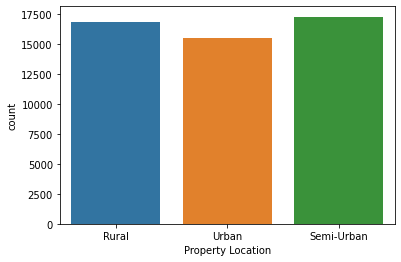

In [ ]:
sns.countplot(x=merged_data['Property Location'])
plt.show()

In [ ]:
merged_data.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Type                  0
Property Location              0
Co-Applicant                   0
dtype: int64

**ALL THE NULL VALUES HAVE BEEN IMPUTED**

# Outlier Detection

In [ ]:
def outlier_detection(data, column, threshold=3):

  # Dictionary to store the the z scores
  outliers = {}
  
  # Compute the z-score
  X = data[column]
  mu = X.mean() # Mean of the data
  sigma = X.std() # Standard Deviation of the data

  z_score = (X-mu)/sigma

  # Iterate over each index
  for idx, val in zip(z_score.index, z_score.values):

    # Check if the z_score is greater than the threshold
    if np.abs(val) > 3:
      outliers[idx] = val # Append the index and the val
    
  return outliers

In [ ]:
numerical_columns = [col for col in merged_data.select_dtypes(('float', 'int'))]

# Detect the outliers
outlier_columns = {}
for col in numerical_columns:
  outlier_columns[col] = outlier_detection(merged_data, col)

In [ ]:
outlier_columns

{'Age': {},
 'Co-Applicant': {},
 'Credit Score': {},
 'Current Loan Expenses (USD)': {129: 3.2728852721071813,
  167: 3.084850549835463,
  300: -6.054879872010375,
  513: -6.054879872010375,
  560: -6.054879872010375,
  647: 3.3163874525179904,
  713: -6.054879872010375,
  821: -6.054879872010375,
  949: 3.902070081838508,
  1030: 3.2084088261411625,
  1100: -6.054879872010375,
  1114: -6.054879872010375,
  1160: -6.054879872010375,
  1184: 3.6718710438313127,
  1461: 3.7816622610585915,
  1570: -6.054879872010375,
  1610: 3.326011446795382,
  1635: -6.054879872010375,
  1758: -6.054879872010375,
  1869: 4.8022372237121616,
  1964: 3.9005164325381214,
  2083: 3.171466498331983,
  2099: -6.054879872010375,
  2142: -6.054879872010375,
  2242: -6.054879872010375,
  2287: -6.054879872010375,
  2294: 6.868763420925606,
  2496: 4.07124522788054,
  2617: 4.634702040820536,
  2708: 3.2484152956261023,
  2773: 3.2161770726430925,
  2817: -6.054879872010375,
  2899: 3.7264213970448665,
  2980: 

In [ ]:
cols_with_outlier = ['Loan Amount Request (USD)', 'Income (USD)', 'Dependents', 'Current Loan Expenses (USD)']

# Clip the data
def clip_outlier_columns(data,columns):

  # Iterate over each column
  for col in cols_with_outlier:

    # Extract the min and max limits
    a_min = np.percentile(data[col], 0)
    a_max = np.percentile(data[col], 95)

    # Clip the data
    data[col] = np.clip(data[col], a_min, a_max)
    
  return data

In [ ]:
merged_data_clipped = clip_outlier_columns(merged_data, cols_with_outlier) # Call the function and clip the data

# Feature Engineering

In [ ]:
# Check the Value Counts of Customer ID
merged_data_clipped['Customer ID'].value_counts()


C-37523    1
C-6706     1
C-28537    1
C-23182    1
C-31354    1
          ..
C-9918     1
C-626      1
C-10346    1
C-46215    1
C-30754    1
Name: Customer ID, Length: 49660, dtype: int64

**No reptition of customers**

In [ ]:
# Extract the Numerical Term from the Customer ID
merged_data_clipped['Customer ID Number'] = merged_data_clipped['Customer ID'].apply(lambda x : x[2 : ])

In [ ]:
merged_data_clipped.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number
0,C-36995,Frederica Shealy,1,56,1933.05000,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,Unknown,746,4,Rural,1.0,36995
1,C-33999,America Calderone,0,32,4896.86800,Low,Working,Unknown,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,2,Rural,1.0,33999
2,C-3770,Rosetta Verne,1,65,988.19000,High,Pensioner,None,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,2,Urban,0.0,3770
3,C-26480,Zoe Chitty,1,65,2590.25375,High,Pensioner,None,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,2,Semi-Urban,1.0,26480
4,C-23459,Afton Venema,1,31,2614.77000,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.0,745.55,1,Active,715,4,Semi-Urban,1.0,23459


In [ ]:
property_price = pd.concat((train_data.copy().dropna(subset=['Loan Sanction Amount (USD)'])['Property Price'], test_copy['Property Price']), axis=0).reset_index().drop('index', axis=1)

In [ ]:
merged_data_clipped['Property Price'] = property_price

In [ ]:
merged_data_clipped.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number,Property Price
0,C-36995,Frederica Shealy,1,56,1933.05000,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,Unknown,746,4,Rural,1.0,36995,119933
1,C-33999,America Calderone,0,32,4896.86800,Low,Working,Unknown,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,2,Rural,1.0,33999,54791
2,C-3770,Rosetta Verne,1,65,988.19000,High,Pensioner,None,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,2,Urban,0.0,3770,72440.6
3,C-26480,Zoe Chitty,1,65,2590.25375,High,Pensioner,None,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,2,Semi-Urban,1.0,26480,121442
4,C-23459,Afton Venema,1,31,2614.77000,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.0,745.55,1,Active,715,4,Semi-Urban,1.0,23459,208568


**Loan to Value Ratio**
Loan to value ratio (LVR) is how lenders describe the amount you need to borrow to buy a property. To calculate the LVR, divide the loan amount by the value of the property then multiply by 100 to get a percentage. Banks and financial institutions use this as a measure of whether you can secure the loan.

In [ ]:
merged_data_clipped['Property Price'] = merged_data_clipped['Property Price'].replace('?', np.nan).astype('float')

In [ ]:
merged_data_clipped['Property Price'] = merged_data_clipped['Property Price'].replace(-999.0, np.nan)

In [ ]:
merged_data_clipped['Property Price'].isnull().sum()

509

In [ ]:
non_null_data = merged_data_clipped[['Property Price', 'Loan Amount Request (USD)']].dropna(axis=0)
null_data = merged_data_clipped[['Property Price', 'Loan Amount Request (USD)']][merged_data_clipped['Property Price'].isnull() == True]
null_idx = null_data.index

In [ ]:
# Impute the null values using regression
from sklearn.linear_model import LinearRegression

X = non_null_data['Loan Amount Request (USD)']
y = non_null_data['Property Price']

test = null_data.drop('Property Price', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values.reshape(-1,1), test_size=0.2, random_state=42)

lr_reg = LinearRegression()

# Fit the model
lr_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_reg.score(X_test, y_test)

0.887439166215295

In [ ]:
null_predictions = lr_reg.predict(test.values.reshape(-1,1))

In [ ]:
# fill the null values
for idx, val in zip(null_idx, null_predictions):
  merged_data_clipped['Property Price'].loc[idx] = val

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
merged_data_clipped['Property Price'].isnull().sum()

0

In [ ]:
merged_data_clipped['LVR'] = merged_data_clipped['Loan Amount Request (USD)']/merged_data_clipped['Property Price']

In [ ]:
merged_data_clipped.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number,Property Price,LVR
0,C-36995,Frederica Shealy,1,56,1933.05000,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,Unknown,746,4,Rural,1.0,36995,119933.46,0.607083
1,C-33999,America Calderone,0,32,4896.86800,Low,Working,Unknown,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,2,Rural,1.0,33999,54791.00,0.854839
2,C-3770,Rosetta Verne,1,65,988.19000,High,Pensioner,None,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,2,Urban,0.0,3770,72440.58,0.629385
3,C-26480,Zoe Chitty,1,65,2590.25375,High,Pensioner,None,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,2,Semi-Urban,1.0,26480,121441.51,0.659230
4,C-23459,Afton Venema,1,31,2614.77000,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.0,745.55,1,Active,715,4,Semi-Urban,1.0,23459,208567.91,0.545908


In [ ]:
merged_prop_id_data = merged_data_clipped.groupby('Property ID').mean()

In [ ]:
merged_prop_id_data['Property Price']

Property ID
1      128679.940185
2      150585.369730
3      148261.166888
4      137966.612748
5      146601.710258
           ...      
995    139832.818400
996    118113.239388
997    124865.433636
998    140705.782632
999    118373.460909
Name: Property Price, Length: 999, dtype: float64

*Compute the deviation of property prices from the mean*

In [ ]:
def numerical_deviations_accross_numericals(data, column):
  
  # Group the data by 'Property ID' and extract the ids
  mean_grouped_data = data.groupby('Property ID').mean()
  prop_id = data.groupby('Property ID').mean().index

  amount_id = {}
  # iterate over property id's and compute deviation
  for id in prop_id:
    mean_price = mean_grouped_data[column][id]
    amount_id[id] = mean_price
  return amount_id

In [ ]:
amount_id = numerical_deviations_accross_numericals(merged_data_clipped, 'Property Price')

In [ ]:
merged_data_clipped['Property Price Deviation'] = merged_data_clipped['Property Price'] - merged_data_clipped['Property ID'].apply(lambda x : amount_id[x])

In [ ]:
merged_data_clipped.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number,Property Price,LVR,Property Price Deviation
0,C-36995,Frederica Shealy,1,56,1933.05000,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,Unknown,746,4,Rural,1.0,36995,119933.46,0.607083,-30705.608012
1,C-33999,America Calderone,0,32,4896.86800,Low,Working,Unknown,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,2,Rural,1.0,33999,54791.00,0.854839,-71576.460426
2,C-3770,Rosetta Verne,1,65,988.19000,High,Pensioner,None,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,2,Urban,0.0,3770,72440.58,0.629385,-67001.788462
3,C-26480,Zoe Chitty,1,65,2590.25375,High,Pensioner,None,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,2,Semi-Urban,1.0,26480,121441.51,0.659230,-18779.799762
4,C-23459,Afton Venema,1,31,2614.77000,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.0,745.55,1,Active,715,4,Semi-Urban,1.0,23459,208567.91,0.545908,82210.805882


In [ ]:
loan_amount_id = numerical_deviations_accross_numericals(merged_data_clipped, 'Loan Amount Request (USD)')
merged_data_clipped['Loan Amount Request (USD) Deviation'] = merged_data_clipped['Loan Amount Request (USD)'] - merged_data_clipped['Property ID'].apply(lambda x : amount_id[x])

In [ ]:
merged_data_clipped.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number,Property Price,LVR,Property Price Deviation,Loan Amount Request (USD) Deviation
0,C-36995,Frederica Shealy,1,56,1933.05000,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,Unknown,746,4,Rural,1.0,36995,119933.46,0.607083,-30705.608012,-77829.488012
1,C-33999,America Calderone,0,32,4896.86800,Low,Working,Unknown,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,2,Rural,1.0,33999,54791.00,0.854839,-71576.460426,-79529.990426
2,C-3770,Rosetta Verne,1,65,988.19000,High,Pensioner,None,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,2,Urban,0.0,3770,72440.58,0.629385,-67001.788462,-93849.328462
3,C-26480,Zoe Chitty,1,65,2590.25375,High,Pensioner,None,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,2,Semi-Urban,1.0,26480,121441.51,0.659230,-18779.799762,-60163.389762
4,C-23459,Afton Venema,1,31,2614.77000,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.0,745.55,1,Active,715,4,Semi-Urban,1.0,23459,208567.91,0.545908,82210.805882,-12498.214118


**Create a count feature for all the property ID**

In [ ]:
def count(data, column, x):
  return data[column].value_counts()[x]
  
merged_data_clipped['Property ID Count'] = merged_data_clipped['Property ID'].apply(lambda x : count(merged_data_clipped, 'Property ID', x))

In [ ]:
merged_data_clipped.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number,Property Price,LVR,Property Price Deviation,Loan Amount Request (USD) Deviation,Property ID Count
0,C-36995,Frederica Shealy,1,56,1933.05000,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,Unknown,746,4,Rural,1.0,36995,119933.46,0.607083,-30705.608012,-77829.488012,51
1,C-33999,America Calderone,0,32,4896.86800,Low,Working,Unknown,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,2,Rural,1.0,33999,54791.00,0.854839,-71576.460426,-79529.990426,47
2,C-3770,Rosetta Verne,1,65,988.19000,High,Pensioner,None,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,2,Urban,0.0,3770,72440.58,0.629385,-67001.788462,-93849.328462,39
3,C-26480,Zoe Chitty,1,65,2590.25375,High,Pensioner,None,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,2,Semi-Urban,1.0,26480,121441.51,0.659230,-18779.799762,-60163.389762,42
4,C-23459,Afton Venema,1,31,2614.77000,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.0,745.55,1,Active,715,4,Semi-Urban,1.0,23459,208567.91,0.545908,82210.805882,-12498.214118,51


In [ ]:
merged_data_clipped['Income Stability'].value_counts()

Low     45430
High     4230
Name: Income Stability, dtype: int64

In [ ]:
# Encode the Ordinal Object columns
inc_stab_encoding = { 'Low' : 1,
                     'High' : 2
                     }
merged_data_clipped['Income Stability'] = merged_data_clipped['Income Stability'].apply(lambda x : inc_stab_encoding[x])

In [ ]:
merged_data_clipped['Income to Stability Ratio'] = merged_data_clipped['Income (USD)']/merged_data_clipped['Income Stability']

In [ ]:
merged_data_clipped['Dependents to Age Ratio'] = merged_data_clipped['Dependents']/merged_data_clipped['Age']

In [ ]:
merged_data_clipped['Dependents to Stability Ratio'] = merged_data_clipped['Dependents']/merged_data_clipped['Income Stability']

In [ ]:
merged_data_clipped

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number,Property Price,LVR,Property Price Deviation,Loan Amount Request (USD) Deviation,Property ID Count,Income to Stability Ratio,Dependents to Age Ratio,Dependents to Stability Ratio
0,C-36995,Frederica Shealy,1,56,1933.05000,1,Working,Sales staff,Semi-Urban,72809.58,241.080,N,N,3.0,809.44,0,Unknown,746,4,Rural,1.0,36995,119933.46,0.607083,-30705.608012,-77829.488012,51,1933.050000,0.053571,3.0
1,C-33999,America Calderone,0,32,4896.86800,1,Working,Unknown,Semi-Urban,46837.47,495.810,N,Y,1.0,780.40,0,Unpossessed,608,2,Rural,1.0,33999,54791.00,0.854839,-71576.460426,-79529.990426,47,4896.868000,0.031250,1.0
2,C-3770,Rosetta Verne,1,65,988.19000,2,Pensioner,None,Semi-Urban,45593.04,171.950,N,Y,1.0,833.15,0,Unpossessed,546,2,Urban,0.0,3770,72440.58,0.629385,-67001.788462,-93849.328462,39,494.095000,0.015385,0.5
3,C-26480,Zoe Chitty,1,65,2590.25375,2,Pensioner,None,Rural,80057.92,298.540,N,Y,2.0,832.70,1,Unpossessed,890,2,Semi-Urban,1.0,26480,121441.51,0.659230,-18779.799762,-60163.389762,42,1295.126875,0.030769,1.0
4,C-23459,Afton Venema,1,31,2614.77000,1,Working,High skill tech staff,Semi-Urban,113858.89,491.410,N,Y,2.0,745.55,1,Active,715,4,Semi-Urban,1.0,23459,208567.91,0.545908,82210.805882,-12498.214118,51,2614.770000,0.064516,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49655,C-9076,Tobias Davilla,1,19,1349.60000,1,Commercial associate,Unknown,Semi-Urban,156766.97,500.590,Y,Y,4.0,684.32,0,Inactive,681,4,Semi-Urban,1.0,9076,212778.00,0.736763,67365.764468,11354.734468,47,1349.600000,0.210526,4.0
49656,C-17587,Evelina Hodges,0,22,2019.78000,1,Working,Core staff,Urban,47924.80,243.020,Y,Y,2.0,706.34,0,Inactive,213,4,Urban,1.0,17587,90816.95,0.527708,-64032.746442,-106924.896442,59,2019.780000,0.090909,2.0
49657,C-46479,Karlyn Mckinzie,0,19,2252.03000,1,Working,Core staff,Semi-Urban,18629.88,101.880,Y,N,1.0,656.46,0,Inactive,270,2,Rural,0.0,46479,21566.27,0.863843,-107518.148095,-110454.538095,42,2252.030000,0.052632,1.0
49658,C-3099,Mariana Pulver,1,21,1845.35000,1,Working,Unknown,Semi-Urban,95430.73,271.310,N,Y,2.0,865.46,0,Unpossessed,489,1,Semi-Urban,1.0,3099,120281.17,0.793397,-13486.751702,-38337.191702,47,1845.350000,0.095238,2.0


In [ ]:
# Encode the property location
prop_loc_encoding = {'Rural' : 1,
                     'Semi-Urban' : 2,
                     'Urban' : 3
                     }
# Encode the Propert Location
merged_data_clipped['Property Location'] = merged_data_clipped['Property Location'].apply(lambda x : prop_loc_encoding[x])

In [ ]:
# Encode the Location Column
merged_data_clipped['Location'] = merged_data_clipped['Location'].apply(lambda x : prop_loc_encoding[x])

In [ ]:
# Create a new column "change in location"
merged_data_clipped['Change In Location'] = merged_data_clipped['Location'].astype('str') + 'to' + merged_data_clipped['Property Location'].astype('str')

In [ ]:
merged_data_clipped['Income to Loan Expenses Ratio'] = merged_data_clipped['Income (USD)']/merged_data_clipped['Current Loan Expenses (USD)']
merged_data_clipped['Monthly Savings'] = merged_data_clipped['Income (USD)'] - merged_data_clipped['Current Loan Expenses (USD)']

In [ ]:
merged_data_clipped['Income to Age Ratio'] = merged_data_clipped['Income (USD)']/merged_data_clipped['Age']

In [ ]:
merged_data_clipped['In Debt'] = merged_data_clipped['Monthly Savings'].apply(lambda x : 1 if x < 0 else 0)

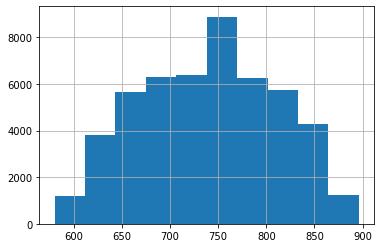

In [ ]:
merged_data_clipped['Credit Score'].hist()

In [ ]:
# Categorize the credit score
def categorize_credit_score(x):
  if 400 <= x < 700:
    x = 1
  elif 700 <= x < 800:
    x = 2
  else:
    x = 3
  return x

# Apply the above encoding to the credit score column
merged_data_clipped['Credit Score Category'] = merged_data_clipped['Credit Score'].apply(lambda x : categorize_credit_score(x))

In [ ]:
merged_data_clipped['Income to Property Price Ratio'] = merged_data_clipped['Income (USD)']/merged_data_clipped['Property Price']
merged_data_clipped['Income to Amount Requested Ratio'] = merged_data_clipped['Income (USD)']/merged_data_clipped['Loan Amount Request (USD)']
merged_data_clipped['Income to Credit Score Ratio'] = merged_data_clipped['Income (USD)']/merged_data_clipped['Credit Score']
merged_data_clipped['Savings to Income Ratio'] = merged_data_clipped['Monthly Savings']/merged_data_clipped['Income (USD)']
merged_data_clipped['Savings to Loan Expenses Ratio'] = merged_data_clipped['Monthly Savings']/merged_data_clipped['Current Loan Expenses (USD)']
merged_data_clipped['Savings to Age Ratio'] = merged_data_clipped['Monthly Savings']/merged_data_clipped['Age']
merged_data_clipped['Savings to Property Price Ratio'] = merged_data_clipped['Monthly Savings']/merged_data_clipped['Property Price']
merged_data_clipped['Savings to Amount Requested Ratio'] = merged_data_clipped['Monthly Savings']/merged_data_clipped['Loan Amount Request (USD)']
merged_data_clipped['Savings to Credit Score Ratio'] = merged_data_clipped['Monthly Savings']/merged_data_clipped['Credit Score']

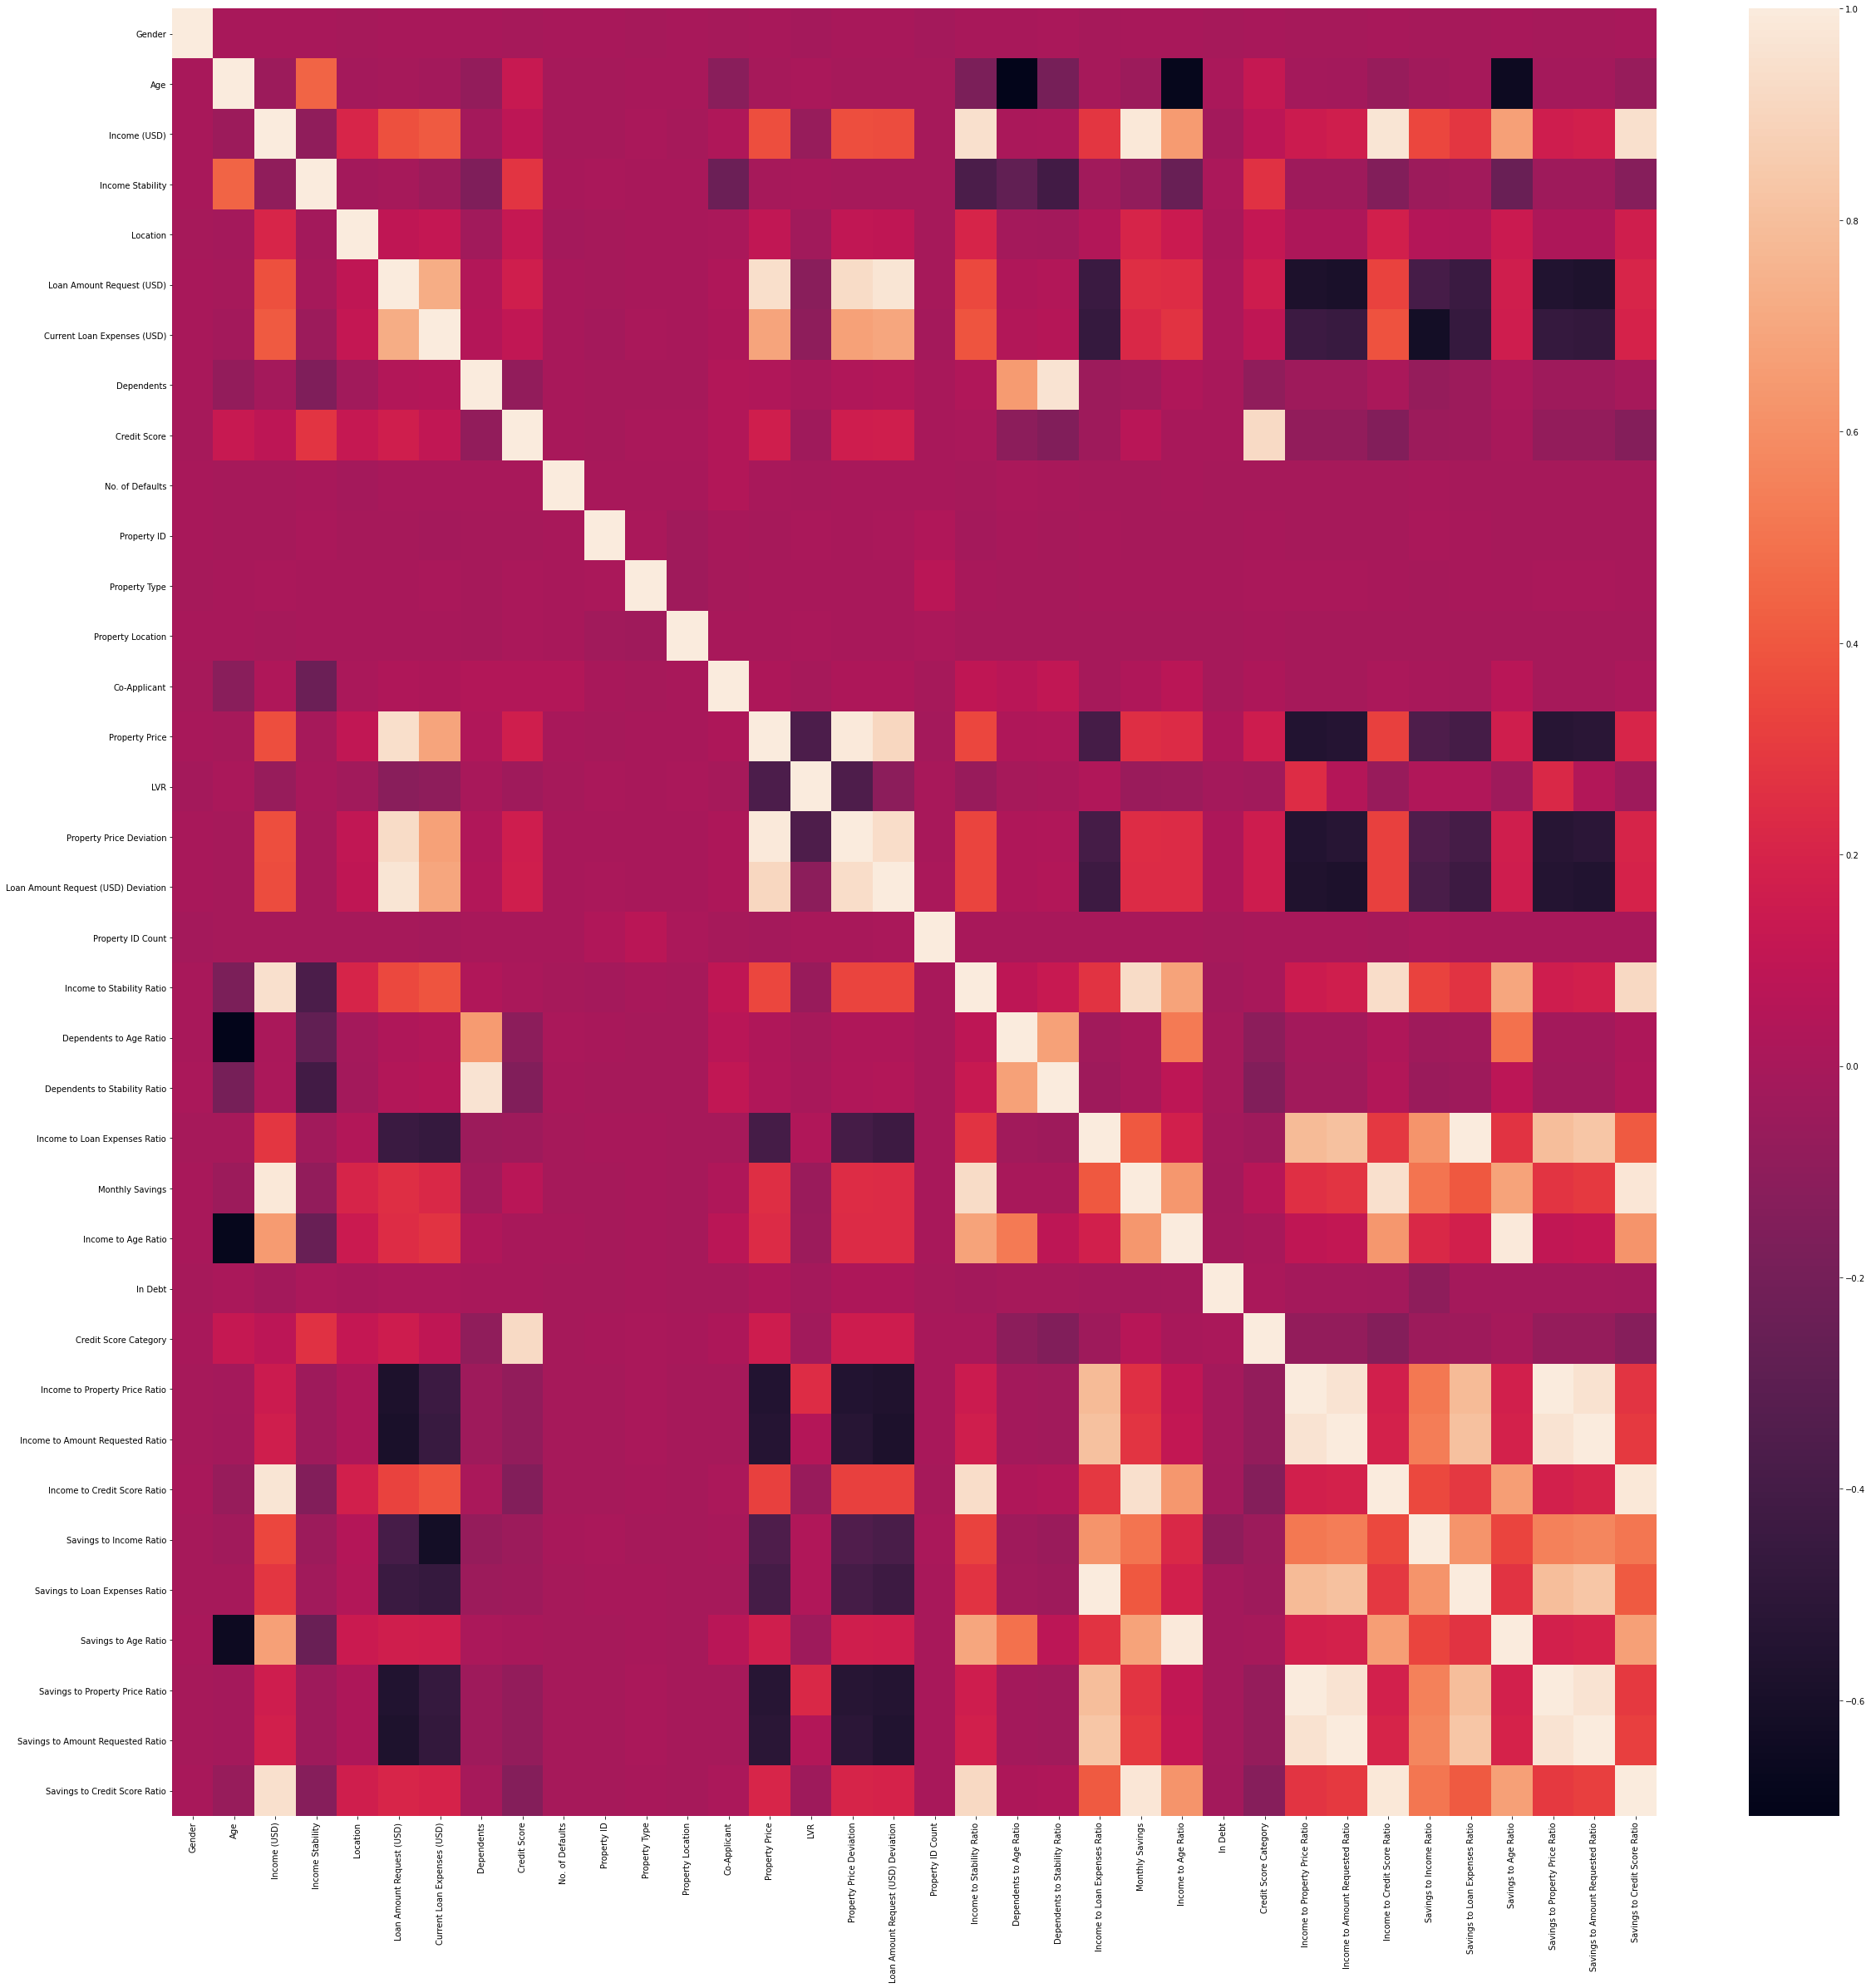

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(merged_data_clipped.corr())
plt.show()



1.   Categorize Age, Income, Property Price, Loan Amount Requested
2.   Create Rankings for Property and Customer and then categorize the same
3.   Make Features with Number of Defaults as well



In [ ]:
merged_data_clipped.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number,Property Price,LVR,Property Price Deviation,Loan Amount Request (USD) Deviation,Property ID Count,Income to Stability Ratio,Dependents to Age Ratio,Dependents to Stability Ratio,Change In Location,Income to Loan Expenses Ratio,Monthly Savings,Income to Age Ratio,In Debt,Credit Score Category,Income to Property Price Ratio,Income to Amount Requested Ratio,Income to Credit Score Ratio,Savings to Income Ratio,Savings to Loan Expenses Ratio,Savings to Age Ratio,Savings to Property Price Ratio,Savings to Amount Requested Ratio,Savings to Credit Score Ratio
0,C-36995,Frederica Shealy,1,56,1933.05000,1,Working,Sales staff,2,72809.58,241.08,N,N,3.0,809.44,0,Unknown,746,4,1,1.0,36995,119933.46,0.607083,-30705.608012,-77829.488012,51,1933.050000,0.053571,3.0,2to1,8.018293,1691.97000,34.518750,0,3,0.016118,0.026549,2.388133,0.875285,7.018293,30.213750,0.014108,0.023238,2.090297
1,C-33999,America Calderone,0,32,4896.86800,1,Working,Unknown,2,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,2,1,1.0,33999,54791.00,0.854839,-71576.460426,-79529.990426,47,4896.868000,0.031250,1.0,2to1,9.876501,4401.05800,153.027125,0,2,0.089374,0.104550,6.274818,0.898750,8.876501,137.533062,0.080324,0.093964,5.639490
2,C-3770,Rosetta Verne,1,65,988.19000,2,Pensioner,None,2,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,2,3,0.0,3770,72440.58,0.629385,-67001.788462,-93849.328462,39,494.095000,0.015385,0.5,2to3,5.746961,816.24000,15.202923,0,3,0.013641,0.021674,1.186089,0.825995,4.746961,12.557538,0.011268,0.017903,0.979704
3,C-26480,Zoe Chitty,1,65,2590.25375,2,Pensioner,None,1,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,2,2,1.0,26480,121441.51,0.659230,-18779.799762,-60163.389762,42,1295.126875,0.030769,1.0,1to2,8.676404,2291.71375,39.850058,0,3,0.021329,0.032355,3.110669,0.884745,7.676404,35.257135,0.018871,0.028626,2.752148
4,C-23459,Afton Venema,1,31,2614.77000,1,Working,High skill tech staff,2,113858.89,491.41,N,Y,2.0,745.55,1,Active,715,4,2,1.0,23459,208567.91,0.545908,82210.805882,-12498.214118,51,2614.770000,0.064516,2.0,2to2,5.320954,2123.36000,84.347419,0,2,0.012537,0.022965,3.507169,0.812064,4.320954,68.495484,0.010181,0.018649,2.848045


**Rank the Properties Based on the count and Price**

In [ ]:
merged_data_clipped['Property Rank 1'] = merged_data_clipped['Property ID Count'].rank(method = 'max', ascending = False) # Rank the property based on the count

In [ ]:
merged_data_clipped['Property Rank 2'] = merged_data_clipped['Property Price'].rank(method='max', ascending=False) # Rank the Property based on the Price

**Rank the Customer Based on the Income, No of Defaults, Credit Score, Monthly Savings**

In [ ]:
merged_data_clipped['Customer Rank 1'] = merged_data_clipped['Income (USD)'].rank(method='max', ascending = False)
merged_data_clipped['Customer Rank 2'] = merged_data_clipped['No. of Defaults'].rank(method='max', ascending = True)
merged_data_clipped['Customer Rank 3'] = merged_data_clipped['Credit Score'].rank(method='max', ascending = False)
merged_data_clipped['Customer Rank 4'] = merged_data_clipped['Monthly Savings'].rank(method='max', ascending = False)

In [ ]:
merged_data_clipped['Expenses to Income Ratio'] = merged_data_clipped['Income to Loan Expenses Ratio'].apply(lambda x : 1/x)

In [ ]:
merged_data_clipped.drop('Income to Loan Expenses Ratio', axis=1, inplace=True)

**Expenses should not be more than 50% of income**

In [ ]:
merged_data_clipped['Expenses to Income Ratio > 0.5'] = merged_data_clipped['Expenses to Income Ratio'].apply(lambda x : 1 if x > 0.5 else 0)

In [ ]:
merged_data_clipped['Expenses to Income Ratio'] = merged_data_clipped['Expenses to Income Ratio'].apply(lambda x : np.clip(x, 0, 1))

In [ ]:
merged_data_clipped['Money for Repayment'] = merged_data_clipped['Monthly Savings'].apply(lambda x : 0.5*x)

**Most lenders require 10-20% of the home's purchase price as a down payment from you. It is also called 'one's own contribution' by some lenders. The rest, which is 80-90% of the property value, is financed by the lender.**

In [ ]:
merged_data_clipped['Downpayment'] = merged_data_clipped['Property Price'].apply(lambda x : 0.20*x) 
merged_data_clipped['Amount Financed'] = merged_data_clipped['Property Price'].apply(lambda x : 0.80*x) 

In [ ]:
merged_data_clipped

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number,Property Price,LVR,Property Price Deviation,Loan Amount Request (USD) Deviation,Property ID Count,Income to Stability Ratio,Dependents to Age Ratio,Dependents to Stability Ratio,Change In Location,Monthly Savings,Income to Age Ratio,In Debt,Credit Score Category,Income to Property Price Ratio,Income to Amount Requested Ratio,Income to Credit Score Ratio,Savings to Income Ratio,Savings to Loan Expenses Ratio,Savings to Age Ratio,Savings to Property Price Ratio,Savings to Amount Requested Ratio,Savings to Credit Score Ratio,Property Rank 1,Property Rank 2,Customer Rank 1,Customer Rank 2,Customer Rank 3,Customer Rank 4,Expenses to Income Ratio,Expenses to Income Ratio > 0.5,Money for Repayment,Downpayment,Amount Financed
0,C-36995,Frederica Shealy,1,56,1933.05000,1,Working,Sales staff,2,72809.58,241.080,N,N,3.0,809.44,0,Unknown,746,4,1,1.0,36995,119933.46,0.607083,-30705.608012,-77829.488012,51,1933.050000,0.053571,3.0,2to1,1691.97000,34.518750,0,3,0.016118,0.026549,2.388133,0.875285,7.018293,30.213750,0.014108,0.023238,2.090297,25330.0,22777.0,32957.0,40114.0,9716.0,30347.0,0.124715,0,845.985000,23986.692,95946.768
1,C-33999,America Calderone,0,32,4896.86800,1,Working,Unknown,2,46837.47,495.810,N,Y,1.0,780.40,0,Unpossessed,608,2,1,1.0,33999,54791.00,0.854839,-71576.460426,-79529.990426,47,4896.868000,0.031250,1.0,2to1,4401.05800,153.027125,0,2,0.089374,0.104550,6.274818,0.898750,8.876501,137.533062,0.080324,0.093964,5.639490,35112.0,39669.0,2483.0,40114.0,15384.0,888.0,0.101250,0,2200.529000,10958.200,43832.800
2,C-3770,Rosetta Verne,1,65,988.19000,2,Pensioner,None,2,45593.04,171.950,N,Y,1.0,833.15,0,Unpossessed,546,2,3,0.0,3770,72440.58,0.629385,-67001.788462,-93849.328462,39,494.095000,0.015385,0.5,2to3,816.24000,15.202923,0,3,0.013641,0.021674,1.186089,0.825995,4.746961,12.557538,0.011268,0.017903,0.979704,47562.0,34090.0,47971.0,40114.0,5477.0,46915.0,0.174005,0,408.120000,14488.116,57952.464
3,C-26480,Zoe Chitty,1,65,2590.25375,2,Pensioner,None,1,80057.92,298.540,N,Y,2.0,832.70,1,Unpossessed,890,2,2,1.0,26480,121441.51,0.659230,-18779.799762,-60163.389762,42,1295.126875,0.030769,1.0,1to2,2291.71375,39.850058,0,3,0.021329,0.032355,3.110669,0.884745,7.676404,35.257135,0.018871,0.028626,2.752148,45054.0,22461.0,21850.0,49660.0,5554.0,16874.0,0.115255,0,1145.856875,24288.302,97153.208
4,C-23459,Afton Venema,1,31,2614.77000,1,Working,High skill tech staff,2,113858.89,491.410,N,Y,2.0,745.55,1,Active,715,4,2,1.0,23459,208567.91,0.545908,82210.805882,-12498.214118,51,2614.770000,0.064516,2.0,2to2,2123.36000,84.347419,0,2,0.012537,0.022965,3.507169,0.812064,4.320954,68.495484,0.010181,0.018649,2.848045,25330.0,9063.0,16299.0,49660.0,22421.0,20889.0,0.187936,0,1061.680000,41713.582,166854.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49655,C-9076,Tobias Davilla,1,19,1349.60000,1,Commercial associate,Unknown,2,156766.97,500.590,Y,Y,4.0,684.32,0,Inactive,681,4,2,1.0,9076,212778.00,0.736763,67365.764468,11354.734468,47,1349.600000,0.210526,4.0,2to2,849.01000,71.031579,0,1,0.006343,0.008609,1.972177,0.629083,1.696019,44.684737,0.003990,0.005416,1.240662,35112.0,8664.0,43354.0,40114.0,37212.0,46520.0,0.370917,0,424.505000,42555.600,170222.400
49656,C-17587,Evelina Hodges,0,22,2019.78000,1,Working,Core staff,3,47924.80,243.020,Y,Y,2.0,706.34,0,Inactive,213,4,3,1.0,17587,90816.95,0.527708,-64032.746442,-106924.896442,59,2019.780000,0.090909,2.0,3to3,1776.76000,91.808182,0,2,0.022240,0.042145,2.859501,0.879680,7.311168,80.761818,0.019564,0.037074,2

In [ ]:
# Drop the ID and Name Column
merged_data_clipped.drop(['Customer ID', 'Name'], axis=1, inplace=True)

**Encode the Categorical Columns**

In [ ]:
merged_data_clipped.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number,Property Price,LVR,Property Price Deviation,Loan Amount Request (USD) Deviation,Property ID Count,Income to Stability Ratio,Dependents to Age Ratio,Dependents to Stability Ratio,Change In Location,Monthly Savings,Income to Age Ratio,In Debt,Credit Score Category,Income to Property Price Ratio,Income to Amount Requested Ratio,Income to Credit Score Ratio,Savings to Income Ratio,Savings to Loan Expenses Ratio,Savings to Age Ratio,Savings to Property Price Ratio,Savings to Amount Requested Ratio,Savings to Credit Score Ratio,Property Rank 1,Property Rank 2,Customer Rank 1,Customer Rank 2,Customer Rank 3,Customer Rank 4,Expenses to Income Ratio,Expenses to Income Ratio > 0.5,Money for Repayment,Downpayment,Amount Financed
0,1,56,1933.05000,1,Working,Sales staff,2,72809.58,241.08,N,N,3.0,809.44,0,Unknown,746,4,1,1.0,36995,119933.46,0.607083,-30705.608012,-77829.488012,51,1933.050000,0.053571,3.0,2to1,1691.97000,34.518750,0,3,0.016118,0.026549,2.388133,0.875285,7.018293,30.213750,0.014108,0.023238,2.090297,25330.0,22777.0,32957.0,40114.0,9716.0,30347.0,0.124715,0,845.985000,23986.692,95946.768
1,0,32,4896.86800,1,Working,Unknown,2,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,2,1,1.0,33999,54791.00,0.854839,-71576.460426,-79529.990426,47,4896.868000,0.031250,1.0,2to1,4401.05800,153.027125,0,2,0.089374,0.104550,6.274818,0.898750,8.876501,137.533062,0.080324,0.093964,5.639490,35112.0,39669.0,2483.0,40114.0,15384.0,888.0,0.101250,0,2200.529000,10958.200,43832.800
2,1,65,988.19000,2,Pensioner,None,2,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,2,3,0.0,3770,72440.58,0.629385,-67001.788462,-93849.328462,39,494.095000,0.015385,0.5,2to3,816.24000,15.202923,0,3,0.013641,0.021674,1.186089,0.825995,4.746961,12.557538,0.011268,0.017903,0.979704,47562.0,34090.0,47971.0,40114.0,5477.0,46915.0,0.174005,0,408.120000,14488.116,57952.464
3,1,65,2590.25375,2,Pensioner,None,1,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,2,2,1.0,26480,121441.51,0.659230,-18779.799762,-60163.389762,42,1295.126875,0.030769,1.0,1to2,2291.71375,39.850058,0,3,0.021329,0.032355,3.110669,0.884745,7.676404,35.257135,0.018871,0.028626,2.752148,45054.0,22461.0,21850.0,49660.0,5554.0,16874.0,0.115255,0,1145.856875,24288.302,97153.208
4,1,31,2614.77000,1,Working,High skill tech staff,2,113858.89,491.41,N,Y,2.0,745.55,1,Active,715,4,2,1.0,23459,208567.91,0.545908,82210.805882,-12498.214118,51,2614.770000,0.064516,2.0,2to2,2123.36000,84.347419,0,2,0.012537,0.022965,3.507169,0.812064,4.320954,68.495484,0.010181,0.018649,2.848045,25330.0,9063.0,16299.0,49660.0,22421.0,20889.0,0.187936,0,1061.680000,41713.582,166854.328


In [ ]:
dummy_features = ['Profession', 'Has Active Credit Card', 'Change In Location']
label_encoding_features = ['Type of Employment', 'Expense Type 1', 'Expense Type 2']

from sklearn.preprocessing import LabelEncoder

# Label Encode the label encoding features
for col in label_encoding_features:

  # LabelEncoder Object
  le = LabelEncoder()
  merged_data_clipped[col] = le.fit_transform(merged_data_clipped[col])

In [ ]:
# One Hot Encode the dummy features
dummy_data = pd.get_dummies(merged_data_clipped[dummy_features], drop_first=True)

# Concat the dummy data
final_data = pd.concat((merged_data_clipped, dummy_data), axis=1)

In [ ]:
final_data.drop(dummy_features, axis=1, inplace=True)

In [ ]:
final_data

,Gender,Age,Income (USD),Income Stability,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number,Property Price,LVR,Property Price Deviation,Loan Amount Request (USD) Deviation,Property ID Count,Income to Stability Ratio,Dependents to Age Ratio,Dependents to Stability Ratio,Monthly Savings,Income to Age Ratio,In Debt,Credit Score Category,Income to Property Price Ratio,Income to Amount Requested Ratio,Income to Credit Score Ratio,Savings to Income Ratio,Savings to Loan Expenses Ratio,Savings to Age Ratio,Savings to Property Price Ratio,Savings to Amount Requested Ratio,Savings to Credit Score Ratio,Property Rank 1,Property Rank 2,Customer Rank 1,Customer Rank 2,Customer Rank 3,Customer Rank 4,Expenses to Income Ratio,Expenses to Income Ratio > 0.5,Money for Repayment,Downpayment,Amount Financed,Profession_Commercial associate,Profession_Maternity leave,Profession_Pensioner,Profession_State servant,Profession_Student,Profession_Unemployed,Profession_Working,Has Active Credit Card_Inactive,Has Active Credit Card_Unknown,Has Active Credit Card_Unpossessed,Change In Location_1to2,Change In Location_1to3,Change In Location_2to1,Change In Location_2to2,Change In Location_2to3,Change In Location_3to1,Change In Location_3to2,Change In Location_3to3
0,1,56,1933.05000,1,15,2,72809.58,241.080,0,0,3.0,809.44,0,746,4,1,1.0,36995,119933.46,0.607083,-30705.608012,-77829.488012,51,1933.050000,0.053571,3.0,1691.97000,34.518750,0,3,0.016118,0.026549,2.388133,0.875285,7.018293,30.213750,0.014108,0.023238,2.090297,25330.0,22777.0,32957.0,40114.0,9716.0,30347.0,0.124715,0,845.985000,23986.692,95946.768,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,32,4896.86800,1,18,2,46837.47,495.810,0,1,1.0,780.40,0,608,2,1,1.0,33999,54791.00,0.854839,-71576.460426,-79529.990426,47,4896.868000,0.031250,1.0,4401.05800,153.027125,0,2,0.089374,0.104550,6.274818,0.898750,8.876501,137.533062,0.080324,0.093964,5.639490,35112.0,39669.0,2483.0,40114.0,15384.0,888.0,0.101250,0,2200.529000,10958.200,43832.800,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,1,65,988.19000,2,12,2,45593.04,171.950,0,1,1.0,833.15,0,546,2,3,0.0,3770,72440.58,0.629385,-67001.788462,-93849.328462,39,494.095000,0.015385,0.5,816.24000,15.202923,0,3,0.013641,0.021674,1.186089,0.825995,4.746961,12.557538,0.011268,0.017903,0.979704,47562.0,34090.0,47971.0,40114.0,5477.0,46915.0,0.174005,0,408.120000,14488.116,57952.464,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1,65,2590.25375,2,12,1,80057.92,298.540,0,1,2.0,832.70,1,890,2,2,1.0,26480,121441.51,0.659230,-18779.799762,-60163.389762,42,1295.126875,0.030769,1.0,2291.71375,39.850058,0,3,0.021329,0.032355,3.110669,0.884745,7.676404,35.257135,0.018871,0.028626,2.752148,45054.0,22461.0,21850.0,49660.0,5554.0,16874.0,0.115255,0,1145.856875,24288.302,97153.208,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,1,31,2614.77000,1,6,2,113858.89,491.410,0,1,2.0,745.55,1,715,4,2,1.0,23459,208567.91,0.545908,82210.805882,-12498.214118,51,2614.770000,0.064516,2.0,2123.36000,84.347419,0,2,0.012537,0.022965,3.507169,0.812064,4.320954,68.495484,0.010181,0.018649,2.848045,25330.0,9063.0,16299.0,49660.0,22421.0,20889.0,0.187936,0,1061.680000,41713.582,166854.328,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49655,1,19,1349.60000,1,18,2,156766.97,500.590,1,1,4.0,684.32,0,681,4,2,1.0,9076,212778.00,0.736763,67365.764468,11354.734468,47,1349.600000,0.210526,4.0,849.01000,71.031579,0,1,0.006343,0.008609,1.972177,0.629083,1.696019,44.684737,0.003990,0.005416,1.240662,35112.0,8664.0,43354.0,40114.0,37212.0,46520.0,0.370917,0,424.505000,42555.600,170222.400,1,0,0,0,0,0,0,1,0,0,0,0

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

# Iterate over each column and scale each feature
for col in final_data.columns:

  # MinMaxScaler Object
  mms = MinMaxScaler()
  final_data[col] = mms.fit_transform(final_data[col].values.reshape(-1,1))

In [ ]:
final_data.head()

,Gender,Age,Income (USD),Income Stability,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Property ID,Property Type,Property Location,Co-Applicant,Customer ID Number,Property Price,LVR,Property Price Deviation,Loan Amount Request (USD) Deviation,Property ID Count,Income to Stability Ratio,Dependents to Age Ratio,Dependents to Stability Ratio,Monthly Savings,Income to Age Ratio,In Debt,Credit Score Category,Income to Property Price Ratio,Income to Amount Requested Ratio,Income to Credit Score Ratio,Savings to Income Ratio,Savings to Loan Expenses Ratio,Savings to Age Ratio,Savings to Property Price Ratio,Savings to Amount Requested Ratio,Savings to Credit Score Ratio,Property Rank 1,Property Rank 2,Customer Rank 1,Customer Rank 2,Customer Rank 3,Customer Rank 4,Expenses to Income Ratio,Expenses to Income Ratio > 0.5,Money for Repayment,Downpayment,Amount Financed,Profession_Commercial associate,Profession_Maternity leave,Profession_Pensioner,Profession_State servant,Profession_Student,Profession_Unemployed,Profession_Working,Has Active Credit Card_Inactive,Has Active Credit Card_Unknown,Has Active Credit Card_Unpossessed,Change In Location_1to2,Change In Location_1to3,Change In Location_2to1,Change In Location_2to2,Change In Location_2to3,Change In Location_3to1,Change In Location_3to2,Change In Location_3to3
0,0.5,0.808511,0.345487,0.0,0.789474,0.5,0.337439,0.688137,0.0,0.0,0.666667,0.725479,0.0,0.746493,1.000000,0.0,1.0,0.739915,0.109476,0.138184,0.119614,0.319570,0.521739,0.371083,0.184622,0.714286,0.321448,0.108298,0.0,1.0,0.021544,0.033905,0.243637,0.493367,0.158281,0.104836,0.021149,0.034260,0.251899,0.509347,0.458648,0.645950,0.0,0.195634,0.611025,0.124715,0.0,0.321448,0.109476,0.109476,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.297872,1.000000,0.0,0.947368,0.5,0.206165,0.829490,0.0,1.0,0.000000,0.633656,0.0,0.608216,0.333333,0.0,1.0,0.679994,0.048924,0.220101,0.082524,0.313249,0.434783,1.000000,0.076705,0.142857,0.758723,0.553187,0.0,0.5,0.123592,0.140795,0.734422,0.500226,0.181046,0.427935,0.116827,0.132330,0.610488,0.706617,0.798808,0.000000,0.0,0.309773,0.017704,0.101250,0.0,0.758723,0.048924,0.048924,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.5,1.000000,0.136829,1.0,0.631579,0.5,0.199875,0.649775,0.0,1.0,0.000000,0.800449,0.0,0.546092,0.333333,1.0,0.0,0.075402,0.065330,0.145558,0.086675,0.260021,0.260870,0.065739,0.000000,0.000000,0.180097,0.035785,0.0,1.0,0.018095,0.027224,0.091851,0.478960,0.130456,0.051680,0.017046,0.026861,0.139692,0.957691,0.686462,0.964199,0.0,0.110272,0.944714,0.174005,0.0,0.180097,0.065330,0.065330,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.5,1.000000,0.490620,1.0,0.631579,0.0,0.374075,0.720022,0.0,1.0,0.333333,0.799026,1.0,0.890782,0.333333,0.5,1.0,0.529611,0.110878,0.155426,0.130436,0.385238,0.326087,0.235717,0.074380,0.142857,0.418253,0.128312,0.0,1.0,0.028804,0.041861,0.334874,0.496132,0.166344,0.120020,0.028032,0.041730,0.318769,0.907113,0.452285,0.410518,1.0,0.111823,0.339671,0.115255,0.0,0.418253,0.110878,0.110878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.276596,0.496034,0.0,0.315789,0.5,0.544919,0.827048,0.0,1.0,0.333333,0.523462,1.0,0.715431,1.000000,0.5,1.0,0.469189,0.191865,0.117958,0.222084,0.562418,0.521739,0.515743,0.237537,0.428571,0.391079,0.295358,0.0,0.5,0.016556,0.028993,0.384942,0.474888,0.125237,0.220088,0.015475,0.027896,0.328457,0.509347,0.182485,0.292855,1.0,0.451479,0.420535,0.187936,0.0,0.391079,0.191865,0.191865,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Split the data back into train and test set
train_final = final_data.iloc[ : train_len].reset_index().drop('index', axis=1)
test_final = final_data.iloc[train_len : ].reset_index().drop('index', axis=1)

# Modelling

In [ ]:
# Model Selection
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Model Metrics
from sklearn.metrics import r2_score

# Create Function to display the metrics
def compute_metrics(data, y_true, model_obj, model):

  # Make Predictions
  y_pred = model_obj.predict(data)

  # Compute the metrics
  metric = max(0, r2_score(y_true, y_pred))

  return metric

# Split the data
X_train, X_test, y_train, y_test = train_test_split(train_final, target_column, test_size=0.2, random_state=42)

## Default Models

In [ ]:
# Build all the default models

# 1. Import the models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor
from xgboost import XGBRegressor

def default_models(X_train, X_test, y_train, y_test):

  # Create model objects
  models = {'LinearRegression' : LinearRegression(),
            'Ridge Regression' : Ridge(),
            'Lasso Regression' : Lasso(),
            'KNN'              : KNeighborsRegressor(),
            'DecisionTree'     : DecisionTreeRegressor(),
            'RandomForest'     : RandomForestRegressor(),
            'Adaboost'         : AdaBoostRegressor(),
            'XGBoost'          : XGBRegressor()
            }

  model_metrics_train = {} # Dictionary for storing the train models metrics
  model_metrics_test = {} # Dictionary for storing the test models metrics
  model_objects = {} # Dictionary for storing the test models objects
  for model, model_obj in models.items():

    # fit the model
    model_obj.fit(X_train, y_train)
    model_objects[model] = model_obj

    # Compute metrics
    model_metrics_train[model] = compute_metrics(X_train, y_train, model_obj, model)
    model_metrics_test[model] = compute_metrics(X_test, y_test, model_obj, model)

  # Create a DataFrame for displaying the results
  train_results = pd.DataFrame(model_metrics_train, index=['R Squared Score Train']).T
  test_results = pd.DataFrame(model_metrics_test, index=['R Squared Score Test']).T

  return train_results, test_results

In [ ]:
# Call the default models method
train_results, test_results = default_models(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6273762845282.148, tolerance: 5550108031.39252



[11:54:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Concat the results
final_results = pd.concat((train_results, test_results), axis=1).sort_values(by='R Squared Score Test', ascending=False)

In [ ]:
final_results

,R Squared Score Train,R Squared Score Test
RandomForest,0.992679,0.937206
XGBoost,0.951752,0.934570
DecisionTree,1.000000,0.881314
LinearRegression,0.700244,0.671882
Lasso Regression,0.695544,0.668172
Ridge Regression,0.692617,0.665253
Adaboost,0.679396,0.648879
KNN,0.687996,0.511448




1.   Random Forest is giving the best test score followed by XGBoost.
2.   Overfitting can be observed in Decision Tree



## Hyperparameter Tuning

In [ ]:
# 1. Decision Tree ---> Cost Complexity pruning

# Create a Decision Tree model
dt_reg = DecisionTreeRegressor(random_state=0)

# fit the model
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
print("Train R Squared {}, Test R Squared {}".format(dt_reg.score(X_train, y_train), dt_reg.score(X_test, y_test)))

Train R Squared 1.0, Test R Squared 0.8818748308680748


**Overfitting can be observed**

In [ ]:
# Cost Complexity Pruning
path = dt_reg.cost_complexity_pruning_path(X_train, y_train) 

# Extract the alphas and impurities
ccp_alphas, ccp_impurities = path.ccp_alphas, path.impurities

In [ ]:
len(ccp_alphas)

16350

In [ ]:
ccp_alphas

array([0.00000000e+00, 1.60767754e-10, 3.21535508e-10, ...,
       1.83307450e+08, 3.58171140e+08, 8.52956405e+08])

In [ ]:
np.random.choice(ccp_alphas)

9.185878964368348

In [ ]:
# Build models with each ccp_alpha
'''
import time
dt_regressors = [] # list to store the regressors
scores = [] # List for storing the scores
start_time = time.time()
for i, alpha in enumerate(ccp_alphas):
  initial_time = time.time()
  # Build a model
  reg_i = DecisionTreeRegressor(ccp_alpha=alpha) # use ccp_alpha value from the ccp_alphas list
  reg_i.fit(X_train, y_train) # Fit the model 
  score = reg_i.score(X_test, y_test) # Compute the score
  dt_regressors.append(reg_i) # append the model
  scores.append(score) # append the score
  end_time = time.time()
  total_time_for_model = end_time - initial_time
  print("Model {} built".format(i))
  print("Total time taken to build model {} with ccp_alpha value {} is {} seconds".format(i, alpha, total_time_for_model))
final_time = time.time()
print("Total time taken in this operation is {} hours".format((final_time-start_time)/3600))'''


def custom_random_model_generator(X_train, X_test, y_train, y_test, ccp_alphas, n_iter=1000):

  dt_regressor_scores = [] # List to store the model score
  random_alphas = [] # List to store the randomly selected alphas
  # Iterate over n_iter
  for i in range(n_iter):

    # Randomly select a ccp_alpha value
    alpha  = np.random.choice(ccp_alphas)
    random_alphas.append(alpha)

    # Build a model witht the alpha value
    reg_i = DecisionTreeRegressor(ccp_alpha = alpha)
    reg_i.fit(X_train, y_train)
    score = reg_i.score(X_test, y_test)
    dt_regressor_scores.append(score)

    # Print Verbose
    print("Iteration {} done".format(i))

  return dt_regressor_scores, random_alphas

dt_scores, alphas = custom_random_model_generator(X_train, X_test, y_train, y_test, ccp_alphas)

Iteration 0 done
Iteration 1 done
Iteration 2 done
Iteration 3 done
Iteration 4 done
Iteration 5 done
Iteration 6 done
Iteration 7 done
Iteration 8 done
Iteration 9 done
Iteration 10 done
Iteration 11 done
Iteration 12 done
Iteration 13 done
Iteration 14 done
Iteration 15 done
Iteration 16 done
Iteration 17 done
Iteration 18 done
Iteration 19 done
Iteration 20 done
Iteration 21 done
Iteration 22 done
Iteration 23 done
Iteration 24 done
Iteration 25 done
Iteration 26 done
Iteration 27 done
Iteration 28 done
Iteration 29 done
Iteration 30 done
Iteration 31 done
Iteration 32 done
Iteration 33 done
Iteration 34 done
Iteration 35 done
Iteration 36 done
Iteration 37 done
Iteration 38 done
Iteration 39 done
Iteration 40 done
Iteration 41 done
Iteration 42 done
Iteration 43 done
Iteration 44 done
Iteration 45 done
Iteration 46 done
Iteration 47 done
Iteration 48 done
Iteration 49 done
Iteration 50 done
Iteration 51 done
Iteration 52 done
Iteration 53 done
Iteration 54 done
Iteration 55 done
It

In [ ]:
# print the maximum score and the corresponding alpha value
max_score = np.max(dt_scores)
max_score

0.9207865567257868

In [ ]:
# Get the ccp value at the 781 index
idx = dt_scores.index(max_score)
alphas[idx]

924620.9477900658

In [ ]:
# Further tune the model
dt_reg_1 = DecisionTreeRegressor()

# Set Params
params = {'criterion' : ["mse", "friedman_mse", "mae", "poisson"],
          'splitter'  : ["best", "random"],
          'max_depth' : [None, 20, 50, 100, 500],
          'min_samples_split' : [2, 4, 6, 8, 10],
          'max_features' : ["auto", "sqrt", "log2"],
          'ccp_alpha' : [924620.9477900658]
          }

# Build the model
rscv_dt = RandomizedSearchCV(dt_reg_1, params, n_iter=10, scoring='r2', cv=3, verbose=1, n_jobs=-1, random_state=42)
# Fit the model
rscv_dt.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [ ]:
# Compute the score
rscv_dt_metrics_train = rscv_dt.score(X_train, y_train)
rscv_dt_metrics_test = rscv_dt.score(X_test, y_test)

In [ ]:
rscv_dt_metrics_test

0.856253126093237

In [ ]:
rscv_dt_metrics_train

0.9224142177382834

In [ ]:
dt_reg_2 = DecisionTreeRegressor(ccp_alpha = 924620.9477900658)
dt_reg_2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=924620.9477900658, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Compute the metrics
dt_reg_2_metrics_train = dt_reg_2.score(X_train, y_train)
dt_reg_2_metrics_test = dt_reg_2.score(X_test, y_test)

In [ ]:
print("Train R squared {} and Test R squared {}".format(dt_reg_2_metrics_train,dt_reg_2_metrics_test))

Train R squared 0.9515513367835217 and Test R squared 0.9233169623144346


In [ ]:
# Final Metrics 
dt_reg_2_metrics = pd.DataFrame({'R Squared Score Train' : dt_reg_2_metrics_train, 'R Squared Score Test' : dt_reg_2_metrics_test}, index=['DecisionTree 2'])
final_metrics =pd.concat((final_results, dt_reg_2_metrics), axis=0).sort_values(by='R Squared Score Test', ascending=False)

In [ ]:
final_metrics

,R Squared Score Train,R Squared Score Test
RandomForest,0.992679,0.937206
XGBoost,0.951752,0.934570
DecisionTree 2,0.951551,0.923317
DecisionTree,1.000000,0.881314
LinearRegression,0.700244,0.671882
Lasso Regression,0.695544,0.668172
Ridge Regression,0.692617,0.665253
Adaboost,0.679396,0.648879
KNN,0.687996,0.511448


In [ ]:
# Random Forest Hyperparameter tuninig

# Model Object
rf_reg = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Create the randomised search cv model
rscv_rf = RandomizedSearchCV(rf_reg, random_grid, n_iter=10, scoring='r2', n_jobs=-1, cv=3, verbose=1)

# Fit teh model
rscv_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



In [ ]:
rscv_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Build the best estimator
rf_reg_1 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Fit the model
rf_reg_1.fit(X_train, y_train)

# Compute the score
rf_reg_1.score(X_test, y_test), rf_reg_1.score(X_train, y_train)

(0.9401985144105477, 0.9829812023077245)

In [ ]:
# Store the metrics
rf_2_metrics_train = rf_reg_1.score(X_train, y_train)
rf_2_metrics_test = rf_reg_1.score(X_test, y_test)

# Final Metrics
rf_metrics = pd.DataFrame({'R Squared Score Train': rf_2_metrics_train,'R Squared Score Test' : rf_2_metrics_test}, index=['RandomForest 2'])
final_metrics = pd.concat((final_metrics, rf_metrics), axis=0).sort_values(by='R Squared Score Test', ascending=False)

In [ ]:
# Build the best estimator
rf_reg_2 = RandomForestRegressor(bootstrap=True, ccp_alpha=924620.9477900658, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rf_reg_2.fit(X_train, y_train)

# Store the metrics
rf_3_metrics_train = rf_reg_2.score(X_train, y_train)
rf_3_metrics_test = rf_reg_2.score(X_test, y_test)

# Final Metrics
rf_metrics_2 = pd.DataFrame({'R Squared Score Train': rf_3_metrics_train,'R Squared Score Test' : rf_3_metrics_test}, index=['RandomForest 3'])
final_metrics = pd.concat((final_metrics, rf_metrics_2), axis=0).sort_values(by='R Squared Score Test', ascending=False)

In [ ]:
final_metrics

,R Squared Score Train,R Squared Score Test
RandomForest 2,0.982981,0.940199
RandomForest 3,0.956956,0.939389
RandomForest,0.992679,0.937206
XGBoost,0.951752,0.934570
DecisionTree 2,0.951551,0.923317
DecisionTree,1.000000,0.881314
LinearRegression,0.700244,0.671882
Lasso Regression,0.695544,0.668172
Ridge Regression,0.692617,0.665253
Adaboost,0.679396,0.648879


In [ ]:
# Hyperparameter tuning XGBoost

# Grid of parameters
params = {'n_estimators' : [500, 600, 700, 800],
          'max_depth' : [5, 7, 9]
    
}
# Model Object
xgb_reg_1 = XGBRegressor(n_jobs=-1, random_state=42)

# Randomized Search CV
rscv_xgb = RandomizedSearchCV(xgb_reg_1, params, n_jobs=-1, cv=3, verbose=1)

# Fit the model
rscv_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 24.4min finished


[13:08:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                

In [ ]:
xgb_best_est = rscv_xgb.best_estimator_
xgb_best_est

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
np.mean(rscv_xgb.cv_results_['split0_test_score']), np.mean(rscv_xgb.cv_results_['split1_test_score']), np.mean(rscv_xgb.cv_results_['split2_test_score'])

(0.9484826653802652, 0.9473341997386839, 0.9433204274592976)

In [ ]:
np.std(rscv_xgb.cv_results_['split0_test_score']), np.std(rscv_xgb.cv_results_['split1_test_score']), np.std(rscv_xgb.cv_results_['split2_test_score'])

(0.001004918917170973, 0.0004961714295185424, 0.0009206248785685237)

In [ ]:
# Store the metrics
xgb_2_metrics_train = rscv_xgb.score(X_train, y_train)
xgb_2_metrics_test = rscv_xgb.score(X_test, y_test)

# Final Metrics
xgb_metrics = pd.DataFrame({'R Squared Score Train': xgb_2_metrics_train,'R Squared Score Test' : xgb_2_metrics_test}, index=['XGBoost 2'])
final_metrics = pd.concat((final_metrics, xgb_metrics), axis=0).sort_values(by='R Squared Score Test', ascending=False)

In [ ]:
final_metrics

,R Squared Score Train,R Squared Score Test
XGBoost 2,0.987139,0.943295
RandomForest 2,0.982981,0.940199
RandomForest 3,0.956956,0.939389
RandomForest,0.992679,0.937206
XGBoost,0.951752,0.934570
DecisionTree 2,0.951551,0.923317
DecisionTree,1.000000,0.881314
LinearRegression,0.700244,0.671882
Lasso Regression,0.695544,0.668172
Ridge Regression,0.692617,0.665253


In [ ]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Build the model
model = Sequential()

# Add layers
model.add(Dense(100, activation='relu', input_shape = (X_train.shape[1],)))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(120, activation='relu'))
model.add(Dense(1))

# Callbacks
cb = EarlyStopping(patience=10)

# Print the summary
print(model.summary())

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])

# fit the model
hist = model.fit(X_train, y_train, batch_size=32, epochs=1000, callbacks=cb, validation_split=0.2, workers=-1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 100)               6900      
_________________________________________________________________
dense_23 (Dense)             (None, 120)               12120     
_________________________________________________________________
dense_24 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_25 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_26 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_27 (Dense)             (None, 120)               14520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)              

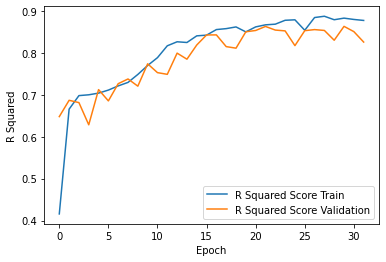

In [ ]:
# Plot the errors
h = hist.history
plt.plot(h['coeff_determination'], label = 'R Squared Score Train')
plt.plot(h['val_coeff_determination'], label = 'R Squared Score Validation')
plt.xlabel('Epoch')
plt.ylabel('R Squared')
plt.legend()
plt.show()

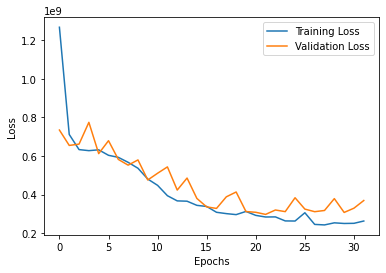

In [ ]:
plt.plot(h['loss'], label = 'Training Loss')
plt.plot(h['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Compute the metrics
nn_metrics_train = model.evaluate(X_train, y_train)
nn_metrics_test = model.evaluate(X_test, y_test)

nn_metrics = pd.DataFrame({'R Squared Score Train' : nn_metrics_train[1], 'R Squared Score Test' : nn_metrics_test[1]}, index=['Neural Network'])
final_metrics = pd.concat((final_metrics, nn_metrics), axis=0).sort_values(by='R Squared Score Test')

186/186 [==============================] - 0s 1ms/step - loss: 387385632.0000 - coeff_determination: 0.7992


In [ ]:
final_metrics = final_metrics.sort_values(by='R Squared Score Test', ascending=False)

In [ ]:
final_metrics

,R Squared Score Train,R Squared Score Test
XGBoost 2,0.987139,0.943295
RandomForest 2,0.982981,0.940199
RandomForest 3,0.956956,0.939389
RandomForest,0.992679,0.937206
XGBoost,0.951752,0.934570
DecisionTree 2,0.951551,0.923317
DecisionTree,1.000000,0.881314
Neural Network,0.880695,0.799227
LinearRegression,0.700244,0.671882
Lasso Regression,0.695544,0.668172


In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_reg.score(X_test, y_test)

0.9365839640136033

In [ ]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

[14:54:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_reg.score(X_test, y_test)

0.9345704590623569

**TOP MODELS : XGBOOST 2, RANDOM FOREST 2, RANDOM FOREST 3, Random Forest, XGBOOST, DECISION TREE 2.**

In [ ]:
path = "/content/" # Path to store the submissions

In [ ]:
'predictions_{}'.format(2) + '/'

'predictions_2/'

In [ ]:
# Make first set of predictions
import os
def make_predictions(data, validation_data, model_dictionary, ID, ID_column, target, prediction_set, path = path):

  new_path = path + 'predictions_{}'.format(prediction_set) + '/'
  os.mkdir(new_path)
  # Cross Validation perforamnce
  cv_scores = {}
  model_predictions = {}
  # Iterate over model dictionary and make predicions
  for model, model_obj in model_dictionary.items():

    print("{} predictions started".format(model))
    # Compute the cross validation scores
    #cv_score[model] = np.mean(cross_val_score(model_obj, validation_data[0], validation_data[1], scoring = 'r2', cv = 5))

    # Make Predictions
    prediction = model_obj.predict(data)
    model_predictions[model] = prediction
    
    # Create a Dataframe
    submissions = pd.DataFrame({ID_column : ID, target : prediction})
    
    # Convert the submissions to csv
    submissions.to_csv(new_path + model + '.csv', index=False)
    print("{} submissions made".format(model))
  
  return model_predictions

In [ ]:
# Create the model_dictionary
model_dictionary = {'xbg_2' : rscv_xgb,
                    'randomforest_2' : rf_reg_1,
                    'randomforest_3' : rf_reg_2,
                    'randomforest_1' : rf_reg,
                    'xgb_1' : xgb_reg,
                    'decisiontree_2' : dt_reg_2
                    }

# Prepare the ID
test_id = test_data['Customer ID'].values.tolist()
ID_column = 'Customer ID'
target = 'Loan Sanction Amount (USD)'
data = test_final
validation_data = (X_test, y_test)

In [ ]:
# Call the function
model_predictions = make_predictions(data=data, validation_data=validation_data, model_dictionary=model_dictionary, ID=test_id, ID_column=ID_column, target=target, prediction_set=1)

xbg_2 predictions started
xbg_2 submissions made
randomforest_2 predictions started
randomforest_2 submissions made
randomforest_3 predictions started
randomforest_3 submissions made
randomforest_1 predictions started
randomforest_1 submissions made
xgb_1 predictions started
xgb_1 submissions made
decisiontree_2 predictions started
decisiontree_2 submissions made


In [ ]:
!zip -r /content/predictions_1.zip /content/predictions_1

  adding: content/predictions_1/ (stored 0%)
  adding: content/predictions_1/randomforest_2.csv (deflated 53%)
  adding: content/predictions_1/randomforest_3.csv (deflated 71%)
  adding: content/predictions_1/randomforest_1.csv (deflated 60%)
  adding: content/predictions_1/decisiontree_2.csv (deflated 82%)
  adding: content/predictions_1/xbg_2.csv (deflated 54%)
  adding: content/predictions_1/xgb_1.csv (deflated 56%)


# Feature Selection

In [ ]:
feature_importances = rf_reg_2.feature_importances_.tolist() # Store the feature importance
features = final_data.columns.tolist() # Store the columns

In [ ]:
feature_importances

array([0.00000000e+00, 8.97124791e-05, 2.83019781e-05, 3.08354797e-04,
       1.27896532e-04, 5.57794722e-05, 5.58041107e-01, 9.68237016e-04,
       3.88502942e-05, 2.12856486e-06, 8.37889371e-05, 9.12864623e-02,
       1.22016645e-05, 5.53434601e-04, 3.80207110e-05, 3.67485237e-05,
       1.56480236e-04, 2.24947797e-01, 2.12511620e-03, 2.54843347e-03,
       4.23301179e-03, 2.08373282e-04, 1.03024099e-04, 6.75076249e-05,
       1.64300175e-04, 5.01171134e-05, 1.23340004e-05, 1.76064723e-04,
       0.00000000e+00, 2.35327769e-06, 2.31110975e-04, 2.04804508e-05,
       1.28675997e-04, 2.09383187e-05, 3.31502465e-05, 2.00705778e-04,
       1.13091916e-04, 1.69667014e-05, 7.42449569e-05, 1.00702655e-04,
       2.18538280e-03, 3.21376862e-05, 1.65393076e-05, 1.06678917e-01,
       3.66972098e-05, 2.35325224e-05, 0.00000000e+00, 9.76619074e-06,
       1.36352710e-03, 1.71865665e-03, 1.15078470e-05, 0.00000000e+00,
       1.46541082e-04, 2.81769499e-06, 0.00000000e+00, 0.00000000e+00,
      

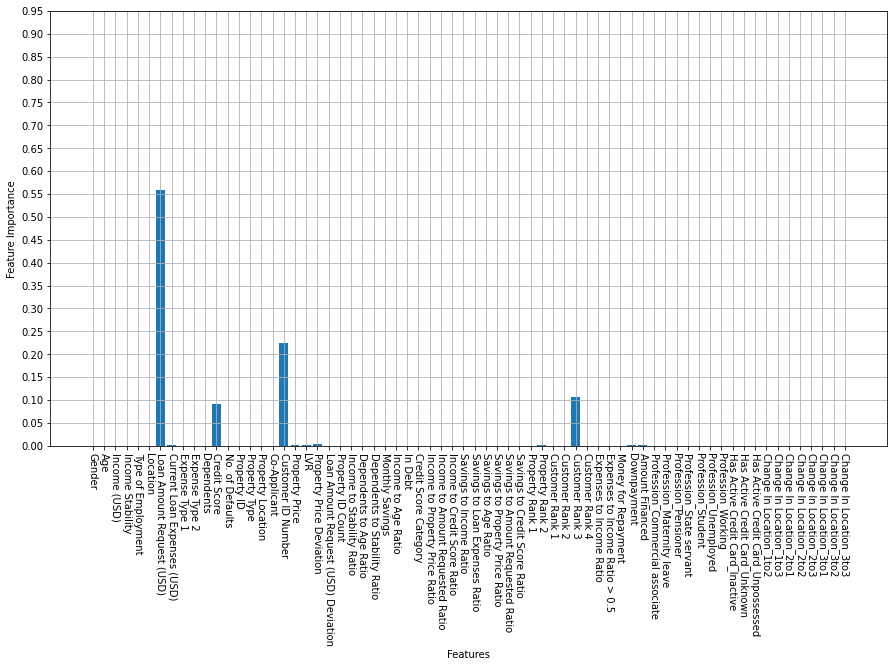

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(x=features, height=feature_importances)
plt.xticks(rotation=-90)
plt.yticks(np.arange(0,1, 0.05))
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Build a model
xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# polynomial features
features = PolynomialFeatures(degree=2)

# Build the pipeline
pipeline = Pipeline(steps = [('Features', features), ('Model', xgb_model)])
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=3, n_jobs=-1, error_score='raise')

In [ ]:
np.mean(n_scores)

0.9469221174431365

In [ ]:
pipeline.fit(X_train, y_train) # Fit the pipeline

[16:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('Features',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('Model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=5, min_child_weight=1,
                              missing=None, n_estimators=500, n_jobs=-1,
                              nthread=None, objective='reg:linear',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

In [ ]:
pipeline.score(X_test, y_test)

0.9439845421072912

In [ ]:
# Make Predictions
pipeline_predictions = pipeline.predict(test_final)

In [ ]:
# Make submissions
submissions_2 = pd.DataFrame({'Customer ID' : test_id, target : pipeline_predictions})
submissions_2.to_csv('/content/predictions_1/polynomial.csv', index=False)

In [ ]:
# Select the features having non-zero feature importances
imp_features = []
for f, f_imp in zip(features, feature_importances):

  if f_imp > 0:
    imp_features.append(f)

In [ ]:
len(imp_features)

62

## Building Models with important features

In [ ]:
final_data_2 = final_data[imp_features]

In [ ]:
# Split the data
train_final_2 = final_data_2.iloc[ : train_len].reset_index().drop('index', axis=1)
test_final_2 = final_data_2.iloc[train_len : ].reset_index().drop('index', axis=1)

In [ ]:
# Split the data into train and test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train_final_2, target_column, test_size=0.2, random_state=42)

In [ ]:
# Build the default models
train_results_2, test_results_2 = default_models(X_train_2, X_test_2, y_train_2, y_test_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6276423276393.735, tolerance: 5550108031.39252



[17:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
final_metrics_2 = pd.concat((train_results_2, test_results_2), axis=1).sort_values(by='R Squared Score Test', ascending = False)

In [ ]:
final_metrics_2

,R Squared Score Train,R Squared Score Test
RandomForest,0.992635,0.937252
XGBoost,0.951644,0.934393
DecisionTree,1.000000,0.884955
LinearRegression,0.700156,0.671843
Lasso Regression,0.695456,0.668125
Ridge Regression,0.692521,0.665202
Adaboost,0.685473,0.653994
KNN,0.690883,0.514369


**No difference observed**